# Lets use a selection of well-characterised HARPS and CKS stars to verify stellar parameters are ok

In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.io import ascii

import warnings
warnings.filterwarnings("ignore")
import re

from stellar import starpars

%load_ext autoreload
%autoreload 2

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
#Kepler planet hosts with HIRES spectra and Gaia:

cks_dat=ascii.read("stellar/cks_gaia_bright_xmatch.txt").to_pandas()
#https://iopscience.iop.org/1538-3881/156/6/254/suppdata/ajaae70at3_mrt.txt").to_pandas()

#No quoted uncertainties, so using the "average" of 3%:
cks_dat['rho']=cks_dat['M*']/cks_dat['R*']**3
cks_dat['em_rho']=cks_dat['rho']-(0.97*cks_dat['M*'])/(1.03*cks_dat['R*'])**3
cks_dat['ep_rho']=(1.03*cks_dat['M*'])/(0.97*cks_dat['R*'])**3-cks_dat['rho']

#Adding KepID name from KOI list
kois=pd.read_csv("https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?&table=cumulative&format=csv").loc[:,['kepid','kepoi_name']]

cks_dat=pd.merge(cks_dat,kois.rename(columns={'kepoi_name':'KOI'}),how='inner')

#Data from https://iopscience.iop.org/article/10.3847/1538-3881/aae70a

In [3]:
'''# Nearby FGK stars:
catsup=cdsr.read("stellar/apjaa8b0ft3_mrt.txt").to_pandas()

#Data from https://iopscience.iop.org/article/10.3847/1538-4357/aa8b0f#apjaa8b0ft3

#Adding TICs and KICs to catsup:
catsup['TIC']=np.zeros(len(catsup['HIP']))
catsup['KIC']=np.zeros(len(catsup['HIP']))

for row in catsup.loc[:,['RAdeg','DEdeg']].iterrows():
    ticout=Catalogs.query_criteria(catalog="Tic",coordinates=str(coor.ra.deg)+','+str(coor.dec.deg),
                                   radius=20*u.arcsecond,objType="STAR",columns=['ID','KIC','Tmag','Vmag']).to_pandas()
    catsup.loc[row[0],'TIC']=ticout.iloc[np.argmin(ticout['Tmag']),'ID']
    catsup.loc[row[0],'KIC']=ticout.iloc[np.argmin(ticout['Tmag']),'KIC']
    
'''
#No Mass/Radii, so deleting ^

'# Nearby FGK stars:\ncatsup=cdsr.read("stellar/apjaa8b0ft3_mrt.txt").to_pandas()\n\n#Data from https://iopscience.iop.org/article/10.3847/1538-4357/aa8b0f#apjaa8b0ft3\n\n#Adding TICs and KICs to catsup:\ncatsup[\'TIC\']=np.zeros(len(catsup[\'HIP\']))\ncatsup[\'KIC\']=np.zeros(len(catsup[\'HIP\']))\n\nfor row in catsup.loc[:,[\'RAdeg\',\'DEdeg\']].iterrows():\n    ticout=Catalogs.query_criteria(catalog="Tic",coordinates=str(coor.ra.deg)+\',\'+str(coor.dec.deg),\n                                   radius=20*u.arcsecond,objType="STAR",columns=[\'ID\',\'KIC\',\'Tmag\',\'Vmag\']).to_pandas()\n    catsup.loc[row[0],\'TIC\']=ticout.iloc[np.argmin(ticout[\'Tmag\']),\'ID\']\n    catsup.loc[row[0],\'KIC\']=ticout.iloc[np.argmin(ticout[\'Tmag\']),\'KIC\']\n    \n'

In [4]:
#Kepler Asteroseismic stars:
cdsr = ascii.get_reader(ascii.Cds)

kepas = cdsr.read("stellar/KepASstars.txt").to_pandas()

kepas['rho'] = kepas['Mass']/kepas['Rad']**3
kepas['em_rho'] = kepas['rho'] - (kepas['Mass']-kepas['e_Mass'])/(kepas['Rad']+kepas['e_Rad'])**3
kepas['ep_rho'] = (kepas['Mass']+kepas['e_Mass'])/(kepas['Rad']-kepas['e_Rad'])**3 - kepas['rho']

#From https://www.aanda.org/articles/aa/full_html/2017/05/aa29496-16/aa29496-16.html

In [5]:
Dens_ic={}
Dens_iso={}
Dens_off={}

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 6603624.0
No 2MASS for 6603624.0
No griz for 6603624.0
54
teff 135657
lum 673
feh 673
number of models used within non-phot obsconstraints: 673
number of models incl reddening: 673
number of models after phot constraints: 0
----
No BV for 6603624.0
No 2MASS for 6603624.0
No griz for 6603624.0
54
teff 135657
lum 673
feh 673
number of models used within non-phot obsconstraints: 673
number of models incl reddening: 673
number of models after phot constraints: 0
----
No BV for 660362

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 7206837.0
No griz for 7206837.0
54
teff 252732
lum 4314
feh 4314
number of models used within non-phot obsconstraints: 4314
number of models incl reddening: 4314
number of models after phot constraints: 4314
----
teff 6291.0519982310625 280.2712770317612 380.22608092187056
logg 4.086951501581296 0.10636254777763376 0.129646909739973

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
54
teff 255921
lum 5624
feh 5624
number of models used within non-phot obsconstraints: 5624
number of models incl reddening: 5624
number of models after phot constraints: 5624
----
teff 6202.189135472665 263.3529108384455 356.6643223218207
logg 4.061835138422848 0.11195145292515019 0.13462866656508465
feh 0.02518538601892247 0.3206656129688724 0.6638185897481955
rad 1.654871656060544 0.21188623436095733 0.13149329821588007
mass 1.2382826755607395 0.1597115636023687 0.29035122493627663
rho 0.24923737934030263 0.09825634155130422 0.08033882761791147
lum 3.710825299780

No BV for 8006161.0
No 2MASS for 8006161.0
No griz for 8006161.0
54
teff 361180
lum 375
feh 375
number of models used within non-phot obsconstraints: 375
number of models incl reddening: 375
number of models after phot constraints: 0
----
No BV for 8006161.0
No 2MASS for 8006161.0
No griz for 8006161.0
54
teff 361180
lum 375
feh 375
number of models used within non-phot obsconstraints: 375
number of models incl reddening: 375
number of models after phot constraints: 0
----
No BV for 8006161.0
No 2MASS for 8006161.0
No griz for 8006161.0
54
teff 361180
lum 375
feh 375
number of models used within non-phot obsconstraints: 375
number of models incl reddening: 375
number of models after phot constraints: 0
----
No Gaia mag for 8006161.0
No BV for 8006161.0
No 2MASS for 8006161.0
No griz for 8006161.0
<class 'KeyError'> 626
No Gaia mag for 8006161.0
No BV for 8006161.0
No 2MASS for 8006161.0
No griz for 8006161.0
<class 'KeyError'> 626
No Gaia mag for 8006161.0
No BV for 8006161.0
No 2MASS 

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 8394589.0
No griz for 8394589.0
54
teff 2621452
lum 5201
feh 5201
number of models used within non-phot obsconstraints: 5201
number of models incl reddening: 5201
number of models after phot constraints: 4657
----
teff 6144.565628023302 467.1264511122981 430.56163455142087
logg 4.300305462324983 0.0920724094136558 0.1208987735761484

0.045675198587819946 0.025875 <err | rho> 0.5665
Density errors.  isoclassify: 0.254789894166392 , input cat: 0.045675198587819946
Densities disagree at >1-sigma | isoclassify: 0.43018950617698926 0.10960793875032751 | input cat: 0.5665 0.025875
8938364.0
|IC:  0.401±0.018 | iso:  0.305±0.078 | true:  0.402+0.016-0.015
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.c

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 9206432.0
No griz for 9206432.0
54
teff 151502
lum 2225
feh 2225
number of models used within non-phot obsconstraints: 2225
number of models incl reddening: 2225
number of models after phot constraints: 2225
----
teff 6556.703760264728 296.8360994449331 288.8188178295186
logg 4.131021745361708 0.09783604555977998 0.10508951544180434
feh -0.19368581436572996 0.4368741020231452 0.7451957852901677
rad 1.5487543874914493 0.14589658213657253 0.1297767692642331
mass 1.2384392244042808 0.1843732061895771 0.29696275162978847
rho 0.3165834350148731 0.10062734854247

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 9955598.0
No griz for 9955598.0
54
teff 366175
lum 892
feh 892
number of models used within non-phot obsconstraints: 892
number of models incl reddening: 892
number of models after phot constraints: 892
----
teff 5421.978159922058 201.16752780991283 136.61479783937648
logg 4.487894631236596 0.03926545355045974 0.047636159907806785
feh 0.041849211960564396 0.30268710631800416 0.34046001342120236
rad 0.8994519922223433 0.046197698414268795 0.06348689714153188
mass 0.900734229242758

Querying catalogues. 0 of 1
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
<class 'AttributeError'> 626
<class 'AttributeError'> 626
<class 'AttributeError'> 626
No BV for 10516096.0
<class 'AttributeError'> 626
No Gaia mag for 10516096.0
No BV for 10516096.0
<class 'AttributeError'> 626
No Gaia mag for 10516096.0
No BV for 10516096.0
<class 'AttributeError'> 626
No Gaia mag for 10516096.0
No BV for 10516096.0
No 2MASS for 10516096.0
No griz for 10516096.0
<class 'KeyError'> 626
No Gaia mag for 10516096.0
No BV for 10516096.0
No 2MASS for 10516096.0
No griz for 10516096.0
<class 'KeyError'> 626
0.046064572425828974 0.026395000000000002 <err | rho> 0.573
Density errors.  isoclassify: 100 , input cat: 0.046064572425828974
10516096.0
|IC:  0.406±0.019 | iso:None | true:  0.390+0.011-0.011
INFO: Query finished. [astroquery.utils.tap.core]


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 11253226.0
No 2MASS for 11253226.0
No griz for 11253226.0
54
teff 211108
lum 3285
feh 3285
number of models used within non-phot obsconstraints: 3285
number of models incl reddening: 3285
number of models after phot constraints: 0
----
No BV for 11253226.0
No 2MASS for 11253226.0
No griz for 11253226.0
54
teff 211108
lum 3285
feh 3285
number of models used within non-phot obsconstraints: 3285
number of models incl reddening: 3285
number of models after phot constraints: 0
----
No BV for 11253226.0
No 2MASS for 11253226.0
No griz for 11253226.0
54
teff 2111

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 12069424.0
No griz for 12069424.0
54
teff 114990
lum 271
feh 271
number of models used within non-phot obsconstraints: 271
number of models incl reddening: 271
number of models after phot constraints: 271
----
teff 5819.874018475818 117.61303910764491 178.77936785856855
logg 4.26416603206206 0.09515220084285225 0.05788108490824495
feh 0.2052921809505152 0.17784924130083768 0.3303666588100921
rad 1.2346057732985984 0.07943383661419201 0.049435756203249914
mass 1.0741451512859672 0.11843181598630714 0.14631676540806204
rho 0.5392106500601377 0.15700066175367078 0.08405958322052626
age 6.673083504289283 3.9498544196546446 5.03986469683363
avs 0.017786802585

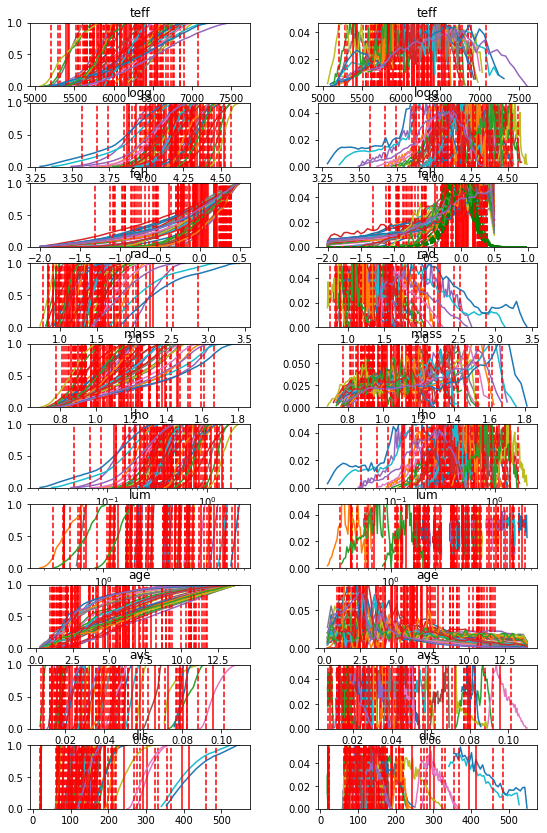

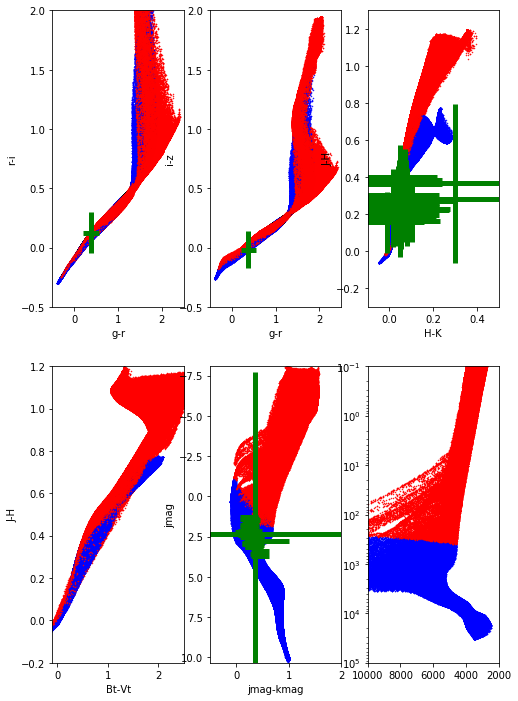

In [14]:
for kepasid,row in kepas.iterrows():
    if row['KIC'] not in list(Dens_ic.keys()) and not np.isnan(row['KIC']):
        #try:
        if 1==1:
            rho_ic,rho_iso = starpars.getStellarDensity(row['KIC'], mission='Kepler')
            print(str(row['KIC']))
            if rho_iso is not None:
                print('|IC:{0:7.3f}±{1:5.3f} | iso:{2:7.3f}±{3:5.3f} | true:{4:7.3f}+{5:5.3f}-{6:5.3f}'.format(rho_ic[0],0.5*(abs(rho_ic[1])+abs(rho_ic[2])),
                                                                                                           rho_iso[0],0.5*(abs(rho_iso[1])+abs(rho_iso[2])),
                                                                                                           row['rho'],row['ep_rho'],row['em_rho']))
            else:
                print('|IC:{0:7.3f}±{1:5.3f} | iso:None | true:{2:7.3f}+{3:5.3f}-{4:5.3f}'.format(rho_ic[0],0.5*(abs(rho_ic[1])+abs(rho_ic[2])),
                                                                                                           row['rho'],row['ep_rho'],row['em_rho']))

            Dens_ic[row['KIC']]=[rho_ic]
            Dens_iso[row['KIC']]=[rho_iso]
            Dens_off[row['KIC']]=[row['rho'],-1*abs(row['em_rho']),row['ep_rho']]
        #except:
        #    print(kepasid)


INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 5
INFO: Quer

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 7
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 5 of 7
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 6 of 7
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 10552611
No 2MASS for 10552611
No griz for 10552611
54
teff 371331
lum 2256
feh 2256
number of models used

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 11015108
No griz for 11015108
54
teff 149181
lum 6280
feh 6280
number of models used within non-phot obsconstraints: 6280
number of models incl reddening: 6280
number of models after phot constraints: 6280
----
teff 5740.161028612024 200.42443138552335 166.6112630686075
logg 4.513143796337692 0.04047150905744257 0.043742555429001406

54
teff 204229
lum 10697
feh 10697
number of models used within non-phot obsconstraints: 10697
number of models incl reddening: 10697
number of models after phot constraints: 10697
----
teff 5751.497303408748 240.3280492355443 196.45770613169316
logg 4.423280106047639 0.05230925173059742 0.06096515178302653
feh -0.05516230756729904 0.34693194204879024 0.4217558808088505
rad 0.9914088453359488 0.07126005693095994 0.08068348300219286
mass 0.9510966530326675 0.09420757414376701 0.1066225761126538
rho 0.9733646239888035 0.19282170755459094 0.1766150485799889
lum 0.9746083960682472 0.06271570860159481 0.05945449113727963
age 6.013345484287398 4.746067901344634 4.092333318809897
avs 0.2743338594770487 0.00035450688119309515 0.0003953914962294136
dis 517.8137669878566 30.66066635512857 34.54447822941677
0.3225474683544304 0.4077 <err | rho> 1.264
Density errors.  isoclassify: 0.18977305473700337 , input cat: 0.3225474683544304
11395587
|IC:  0.896±0.289 | iso:  0.690±0.131 | true:  1.010+0.13

Querying catalogues. 0 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 12404954
No griz for 12404954
54
teff 231591
lum 8158
feh 8158
number of models used within non-phot obsconstraints: 8158
number of models incl reddening: 8158
number of models after phot constraints: 8158
----
teff 5682.355602823801 249.05975572978969 199.38478435424258
logg 4.442113270504916 0.049359795

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 5 of 10
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 6 of 10
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 7 of 10
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 8 of 10
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 9 of 10
INFO:

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 12356617
No griz for 12356617
54
teff 652929
lum 22603
feh 22603
number of models used within non-phot obsconstraints: 22603
number of models incl reddening: 22603
number of models after phot constraints: 20257
----
teff 6052.944677897463 310.5308141777168 484.2656841930793
logg 4.125615686785864 0.11961141567015776 0.1757672828999568
feh 0.03549703924540688 0.3030307365593096 0.4990626261003667
rad 1.4808039726400797 0.2790328449727273 0.13801897074962644
mass 1.135677409596431 0.16061463584841618 0.20822427905511032
rho 0.3248509474609255 0.13713569788581637 0.14040185773585928
lum 2.722896759306735 0.2549494119420319 0.25913347511480556
age 5.546286260774824 4.052337082397656 3.270928565215298
avs 0.056810548746682524 0.00010453320270445432 9.976150168494735e-05
dis 760.974541

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No 2MASS for 3217264
54
teff 628885
lu

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 6 of 12
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 7 of 12
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 8 of 12
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 9 of 12
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.

logg 4.465412863349648 0.045869336726902965 0.055757371820046586
feh 0.023649569700485384 0.31690926063054564 0.3937038651024833
rad 0.929765157510258 0.06259176933793831 0.06924092923204173
mass 0.9215207111486138 0.07822302019735128 0.09184160495854488
rho 1.1443972893242476 0.19881268375955896 0.19546446711045307
lum 0.7405589699403304 0.06909944589116657 0.061306285166013774
age 6.496246775658754 4.873824764753353 4.4084246793813175
avs 0.09339185568245287 0.00019285603433245868 0.001155700349765254
dis 631.0030041347399 36.50857977034343 39.88521734346057
0.29705136334812937 0.46845000000000003 <err | rho> 1.577
Density errors.  isoclassify: 0.17226410554625998 , input cat: 0.29705136334812937
11015323
|IC:  1.118±0.332 | iso:  0.811±0.140 | true:  1.026+0.132-0.115
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 7
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.

No BV for 5689351
No 2MASS for 5689351
No griz for 5689351
54
teff 598298
lum 8155
feh 8155
number of models used within non-phot obsconstraints: 8155
number of models incl reddening: 8155
number of models after phot constraints: 0
----
No BV for 5689351
No 2MASS for 5689351
No griz for 5689351
54
teff 598298
lum 8155
feh 8155
number of models used within non-phot obsconstraints: 8155
number of models incl reddening: 8155
number of models after phot constraints: 0
----
No Gaia mag for 5689351
No BV for 5689351
No 2MASS for 5689351
No griz for 5689351
<class 'KeyError'> 626
No Gaia mag for 5689351
No BV for 5689351
No 2MASS for 5689351
No griz for 5689351
<class 'KeyError'> 626
No Gaia mag for 5689351
No BV for 5689351
No 2MASS for 5689351
No griz for 5689351
<class 'KeyError'> 626
No Gaia mag for 5689351
No BV for 5689351
No 2MASS for 5689351
No griz for 5689351
<class 'KeyError'> 626
0.13470178156467855 0.3478 <err | rho> 2.582
Density errors.  isoclassify: 100 , input cat: 0.13470178

54
teff 1281353
lum 9833
feh 9833
number of models used within non-phot obsconstraints: 9833
number of models incl reddening: 9833
number of models after phot constraints: 9833
----
teff 5302.46045224299 367.4761336394122 332.8016880111418
logg 4.598062652978563 0.07493640305552507 0.057315041228740427
feh -0.5138875196696591 0.7165676135242991 0.9634711590852154
rad 0.7098085271697069 0.10012048610858226 0.08862923826027458
mass 0.7381272878738144 0.10915834714803574 0.06633801280870555
rho 2.00811205587077 0.7108265209908651 0.4502363200800741
lum 0.3682115276769362 0.017636703670378895 0.01801415866233308
age 6.321697139440459 4.951311468026739 4.318341339746379
avs 0.047406444225872 0.0006770553450162545 0.00163452692129918
dis 391.19588224975314 43.77602134995152 38.48780457005455
0.13951349141455438 0.34125 <err | rho> 2.4459999999999997
Density errors.  isoclassify: 0.2890931404142863 , input cat: 0.13951349141455438
6665695
|IC:  1.734±0.242 | iso:  1.423±0.411 | true:  1.665+0

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 12068975
No griz for 1206897

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No griz for 4563268
54
teff 819974
lum 57968
feh 57968
number of models used within non-phot obsconstraints: 57968
number of models incl reddening: 57968
number of models after phot constraints: 55062
----
teff 4603.898740131759 93.49216741955388 163.56224817001112
logg 2.4576246753979367 0.15488377718522806 0.1569586506178693
feh 0.17238422155520833 0.21027542514982084 0.2816384176396539
rad 11.87985256474303 1.6109508593423278 0.6413743986180194
mass 1.5542569400153685 0.5125735829925502 0.3967204606034256
rho 0.0008822603198006354 0.0003644033228916328 0.0003269525119991752
lum 56.62101858706196 13.6476410210430

0.18406666666666668 0.41415 <err | rho> 2.25
Density errors.  isoclassify: 0.28633104523733066 , input cat: 0.18406666666666668
4827723
|IC:  1.595±0.294 | iso:  1.227±0.351 | true:  1.514+0.195-0.170
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 1
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 4841374
No 2MASS for 4841374
No griz for 4841374
54
teff 630909
lum 17907
feh 17907
number of models used within non-phot obsconstraints: 17907
number of models incl reddening: 17907
number of models after phot constraints: 0
----
No BV for 4841374
No 2MASS for 4841374
No griz for 4841374
54
teff 630909
lum 17907
feh 17907
number of models used within non-phot obsconstraints: 17907
number of models incl reddening: 17907
number of models after phot constraints: 0
----
No BV for 4841374
No 2MASS for 4841374


INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 5120087
No griz for 5120087
54
teff 469086
lum 34786
feh 34786
number of models used within non-phot obsconstraints: 34786
number of models incl reddening: 34786
number of models after phot constraints: 33614
----
teff 6113.314305251832 405.0781205335361 397.3923169008558
logg 4.298588504259245 0.08637848029100681 0.11528272904062487
feh -0.18528326834301023 0.47043347271703634 0.702281277718337
rad 1.1704647625825892 0.17647548157527493 0.13883580148481167
mass 1.011504840779650

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 5966154
No 2MASS for 5966154
No griz for 5966154
54
teff 460219
lum 30125
feh 30125
number of models used within non-phot obsconstraints: 30125
number of models incl reddening: 30125
number of models after phot constraints: 0
----
No BV for 5966154
No 2MASS for 5966154
No griz for 5966154
54
teff 460219
lum 30125
feh 30125
number of models used within non-phot obsconstraints: 30125
number of models incl reddening: 30125
number of models after phot constraints: 0
----
No BV for 59

No Gaia mag for 6125481
No BV for 6125481
No 2MASS for 6125481
No griz for 6125481
<class 'KeyError'> 626
No Gaia mag for 6125481
No BV for 6125481
No 2MASS for 6125481
No griz for 6125481
<class 'KeyError'> 626
No Gaia mag for 6125481
No BV for 6125481
No 2MASS for 6125481
No griz for 6125481
<class 'KeyError'> 626
No Gaia mag for 6125481
No BV for 6125481
No 2MASS for 6125481
No griz for 6125481
<class 'KeyError'> 626
1.176759410801964 0.07909 <err | rho> 0.06721
Density errors.  isoclassify: 100 , input cat: 1.176759410801964
6125481
|IC:  0.048±0.056 | iso:None | true:  0.544+0.070-0.061
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 6
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 6
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.c

lum 3.1697963565132876 0.3385598631119997 0.29536317353863817
age 5.832858966487992 2.9000015497757268 2.160002012796545
avs 0.1070771212297253 4.907333880298237e-05 4.5526895007100276e-05
dis 880.6087346349708 46.09439984301105 42.71385127411929
0.6204832881662149 0.27475 <err | rho> 0.4428
Density errors.  isoclassify: 0.21055824325015512 , input cat: 0.6204832881662149
6685609
|IC:  0.314±0.195 | iso:  0.152±0.032 | true:  0.259+0.033-0.029
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 5
INFO: Query finish

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 7115785
No griz for 7115785
54
teff 395664
lum 12455
feh 12455
number of models used within non-phot obsconstraints: 12455
number of models incl reddening: 12455
number of models after phot constraints: 12455
----
teff 5542.15704995662 252.195729353577 203.21094283018738
logg 4.486380613795026 0.0460641914991351 0.055649069135487395
feh -0.06062372679058565 0.3805190370937055 0.4712562133368737
rad 0.8959059346548011 0.06712441747245013 0.07804035214140004
mass 0.8952656454318535 0.08053303200220674 0.09396373728064245
rho 1.2421320122655821 0.25036759920214857 0.21593571125754196
lum 0.6839493311169792 0

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
54
teff 2175816
lum 29681
feh 29681
number of models used within non-phot obsconstraints: 29681
number of models incl reddening: 29681
number of models after phot constraints: 24531
----
teff 5935.828713319714 398.66166560187867 310.2863308295118
logg 4.406328490742285 0.06422390378925336 0.08537431446382993
feh -0.22390632811699912 0.5092620853441572 0.7334830976359112
rad 1.006853666960996 0.11542305968478273 0.11684139675662009
mass 0.9425524207001116 0.11927629886529278 0.12363308207078871
rho 0.9131707718346871 0.26090328852784994 0.2303894051713582
lum 1.1711922287894851 0.09353322716944956 0.10463680615319526
age 6.040969730275519 4.959056565638779 4.176872616755077
avs 0.17259171007187057 0.00023101453546281459 0.0023371803571482774
dis 622.4224632785508 57.40648535135654 58.642812

0.24480910917615537 0.3655 <err | rho> 1.493
Density errors.  isoclassify: 0.2043891577174902 , input cat: 0.24480910917615537
Densities disagree at >1-sigma | isoclassify: 0.8164044985353037 0.16686422781240068 | input cat: 1.493 0.3655
8557374
|IC:  1.058±0.259 | iso:  0.579±0.118 | true:  0.724+0.093-0.081
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 8802165
No 2MASS for 8802165
No griz for 8802165
54
teff 1549476
lum 27563
feh 27563
number of models used within non-phot obsconstraints: 27563
number of models incl redden

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 9266431
No griz for 9266431
54
teff 160205
lum 2811
feh 2811
number of models used within non-phot obsconstraints: 2811
number of models incl reddening: 2811
number of models after phot constraints: 2811
----
teff 5299.345151790289 113.34597139070138 123.04861760330368
logg 4.571663899434543 0.02869058556772508 0.030116275882117627
feh -0.2800982070080978 0.23364567971575367 0.27138550089625973
rad 0.7588770173973435 0.03904945049259423 0.033287746933648776
mass 0.7847360458556677 0.06086669116356591 0.051575497079586086
rho 1.7751687250955699 0.2002665902

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 9702072
No griz for 9702072
54
teff 897689
lum 11069
feh 11069
number of models used within non-phot obsconstraints: 11069
number of models incl reddening: 11069
number of models after phot constraints: 10455
----
teff 5524.938053995227 375.105569407704 323.32096140959857
logg 4.553530843974633 0.06813096715560274 0.06069359191393442
feh -0.4202153016074883 0.6567906516684161 0.8838476994925732
rad 0.7784452734329923 0.09999259671014349 0.09563546445393067
mass 0.7956548017157207 0.10911143885519503 0.08052907449328284
rho 1.6497466996858423 0.5419106098432926 0.3574484236079114
lum 0.5216860828733999 0.02208999492100494 0.024612085310509735
age 6.390208125845947 4.899371087975241 4.377849092604313
avs 0.16256013579178913 0.0014540343516432075 0.001138033548035322
dis 365.0940117308068 37.79902316623344 35.78663942659966
0.18345971563981042 0.38709999999999994 <err | rho> 2.11


INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 6
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 6
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 5 of 6
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 9963524
No griz for 9963524
54
teff 447634
lum 5889
feh 5889
number of models used within non-phot obscons

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No 2MASS for 1026957
54
teff 491717
lum 1887
feh 1887
number of models used within non-phot obsconstraints: 1887
number of models incl reddening: 1887
number of models after phot constraints: 0
----
No 2MASS for 1026957
54
teff 491717
lum 1887
feh 1887
number of models used within non-phot obsconstraints: 1887
number of models incl reddening: 1887
number of models after phot constraints: 0
----
No 2MASS for 1026957
No griz for 1026957
54
teff 491717
lum 1887
feh 1887
number of models used within non-phot obsconstraints: 1887
number of models incl reddening: 1887
number of models after phot constraints: 0
----
No BV for 1026957
No 2MASS for 1026957
No griz for 1026957
54
teff 491717
lum 1887
feh 1887
number of models used within non-phot obsconstraints: 1887
number of models incl reddening:

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 5 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 6 of 8
INFO: Quer

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
54
teff 23499
lum 1403
feh 1403
number

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 5 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.util

0.5029926335174956 0.5462500000000001 <err | rho> 1.0859999999999999
Density errors.  isoclassify: 0.13366178970620252 , input cat: 0.5029926335174956
10528068
|IC:  0.770±0.387 | iso:  0.562±0.075 | true:  0.612+0.079-0.069
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 4
INFO: Query f

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 6 of 7
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 8631160
No griz for 8631160
54
teff 740754
lum 47658
feh 47658
number of models used within non-phot obsconstraints: 47658
number of models incl reddening: 47658
number of models after phot constraints: 34548
----
teff 6308.797755963411 417.50051433946464 528.1688580327173
logg 4.137986727927295 0.11811802295332541 0.17287465387041
feh -0.14674012494941646 0.4230771196795173 0.66438880299119
rad 1.4816029197752303 0.2876209983448903 0.17464628783386904
mass 1.1537610355461174 0.17691474191434597 0.2392222457226555
rho 0.33584355269203414 0.14760456615217593 0.14327253817144225
lum 3.237716479489129 0.41035711128517294 0.4092935456691005
age 4.196295130974101 4.198222163529782 2.624933211736054
avs 0.088

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 6
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 6
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 6
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 6
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 5 of 6
INFO: Quer

mass 1.688640874390696 0.5354571344393413 0.6082349151806667
rho 0.0012515945955989545 0.0011558881469589646 0.0004653010152986881
lum 51.21721137217458 7.652743358623319 8.317919535522364
age 1.8051363804381824 5.2151323479809895 0.977290558620219
avs 0.0895434254781278 1.634067591843591e-05 4.798970388100732e-05
dis 1959.5265970200414 118.98087626594429 210.75305590757216
0.4601890305026493 0.32135 <err | rho> 0.6983
Density errors.  isoclassify: 0.6476494737027159 , input cat: 0.4601890305026493
Densities disagree at >1-sigma | isoclassify: 0.0012515945955989545 0.0008105945811288264 | input cat: 0.6983 0.32135
10928043
|IC:  0.495±0.228 | iso:  0.001±0.001 | true:  0.627+0.081-0.070
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 

0.2975560081466395 0.4383 <err | rho> 1.473
Density errors.  isoclassify: 0.1945947866378794 , input cat: 0.2975560081466395
7211221
|IC:  1.044±0.311 | iso:  0.674±0.131 | true:  0.848+0.109-0.095
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 5
INFO: Query finished. [astroquery.utils.

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 11600889
No griz for 11600889
54
teff 231903
lum 3187
feh 3187
number of models used within non-phot obsconstraints: 3187
number of models incl reddening: 3187
number of models after phot constraints: 3187
----
teff 5534.015191886952 92.20624229279201 126.

54
teff 118021
lum 6334
feh 6334
number of models used within non-phot obsconstraints: 6334
number of models incl reddening: 6334
number of models after phot constraints: 0
----
No BV for 11656246
No 2MASS for 11656246
No griz for 11656246
54
teff 118021
lum 6334
feh 6334
number of models used within non-phot obsconstraints: 6334
number of models incl reddening: 6334
number of models after phot constraints: 0
----
No BV for 11656246
No 2MASS for 11656246
No griz for 11656246
54
teff 118021
lum 6334
feh 6334
number of models used within non-phot obsconstraints: 6334
number of models incl reddening: 6334
number of models after phot constraints: 0
----
No Gaia mag for 11656246
No BV for 11656246
No 2MASS for 11656246
No griz for 11656246
<class 'KeyError'> 626
No Gaia mag for 11656246
No BV for 11656246
No 2MASS for 11656246
No griz for 11656246
<class 'KeyError'> 626
No Gaia mag for 11656246
No BV for 11656246
No 2MASS for 11656246
No griz for 11656246
<class 'KeyError'> 626
No Gaia mag 

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 12159249
No griz for 12159249
54
teff 64062
lum 2426
feh 2426
number of models used within non-phot obsconstraints: 2426
number of models incl reddening: 2426
number of models after phot constraints: 2426
----
teff 5847.092932558399 73.30770456429127 85.38574176322072
logg 4.14536234927595 0.05040699182607433 0.07525045671040953
feh 0.16768520158374128 0.19676704043211574 0.37800653719817845
rad 1.482366143760234 0.058040797932443544 0.05451711311542895
mass 1.1387304685522175 0.10605385422911695 0.1887446547588817
rho 0.3391100060774995 0.0543168646721922

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 5009743
No 2MASS for 5009743
No griz for 5009743
54
teff 2891597
lum 35096
feh 35096
number of models used within non-phot obsconstraints: 35096
number of models incl reddening: 35096
number of models after phot constraints: 0
----
No BV for 5009743
No 2MASS for 5009743
No griz for 5009743
54
teff 2891597
lum 35096
feh 35096
number of models used within non-phot obsconstraints: 35096
number of models incl reddening: 35096
number of models after phot constraints: 0
----
No BV for 5009743
No 2MASS for 5009743
No griz for 5009743
54
teff 2891597
lum 35096
feh

0.07138377107016855 0.018209999999999997 <err | rho> 0.2551
Density errors.  isoclassify: 0.5542371899377907 , input cat: 0.07138377107016855
5561278
|IC:  0.181±0.013 | iso:  0.145±0.080 | true:  0.166+0.021-0.019
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 8685497
No griz for 8685497
54
teff 579167
lum 20932
feh 20932
number of models used within non-phot obsconstraints: 20932
number of models incl reddening: 20932
number of models after phot constraints: 20405
----
teff 5964.725310654044 266.8268456684609 331.0026804319

Querying catalogues. 0 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 6616218
No griz for 6616218
54
teff 377919
lum 3460
feh 3460
number of models used within non-phot obsconstraints: 3460
number of models incl reddening: 3460
number of models after phot constraints: 3460
----
teff 5338.979715363562 162.4926768493333 126.09113480546148
logg 4.502644639505912 0.036974642009

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 8242434
No griz for 8242434
54
teff 635128
lum 3318
feh 3318
number of models used within non-phot obsconstraints: 3318
number of models incl reddening: 3318
number of models after phot constraints: 2479
----
teff 4870.327914707988 285.1067659763148 240.6756978818412
logg 4.619082978485342 0.057344405645901375 0.04094381698498495
feh -0.2686359667572866 0.5249795992832549 0.6459000309972875
rad 0.6771066540261419 0.07221969655343352 0.07279015402889621
mass 0.705978460073702 0.07975590866845395 0.06376532842219573
rho 2.214022748098305 0.6238996767399896 0.3771523307191884
lum 0.2364537549599554 0.0057743

54
teff 130336
lum 2483
feh 2483
number of models used within non-phot obsconstraints: 2483
number of models incl reddening: 2483
number of models after phot constraints: 0
----
No BV for 11017901
No 2MASS for 11017901
No griz for 11017901
54
teff 130336
lum 2483
feh 2483
number of models used within non-phot obsconstraints: 2483
number of models incl reddening: 2483
number of models after phot constraints: 0
----
No BV for 11017901
No 2MASS for 11017901
No griz for 11017901
54
teff 130336
lum 2483
feh 2483
number of models used within non-phot obsconstraints: 2483
number of models incl reddening: 2483
number of models after phot constraints: 0
----
No BV for 11017901
No 2MASS for 11017901
No griz for 11017901
54
teff 130336
lum 2483
feh 2483
number of models used within non-phot obsconstraints: 2483
number of models incl reddening: 2483
number of models after phot constraints: 0
----
No Gaia mag for 11017901
No BV for 11017901
No 2MASS for 11017901
No griz for 11017901
<class 'KeyErro

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 8240797
No griz for 8240797
54
teff 730534
lum 12131
feh 12131
number of models used within non-phot obsconstraints: 12131
number of models incl reddening: 12131
number of models after phot constraints: 11850
----
teff 5838.916894950426 372.77661365777203 315.00034787731147
logg 4.4602750253625985 0.058845601440538964 0.07592882005220591
feh -0.2912225907550471 0.5512394341417858 0.7668216235448394
rad 0.9218393472708681 0.10837696739675695 0.10777037766816999
mass 0.8958779038552455 0.109233204920406 0.11687490010754742
rho 1.1257034888886688 0.31971356744300383 0.26408484479728056
lum 0.906199622080591 0.03832896499161087 0.03719773992632336
age 6.471732213317588 4.788779523475067 4.387548774661955
avs 0.07292545057910656 0.002993465081852817 0.0030971567524471777
dis 359.163692923318 33.37368306134147 34.58037569748808
0.2446905339805825 0.40325 <err | rho> 1.648000000000000

No BV for 9597058
No 2MASS for 9597058
No griz for 9597058
54
teff 398759
lum 7327
feh 7327
number of models used within non-phot obsconstraints: 7327
number of models incl reddening: 7327
number of models after phot constraints: 0
----
No Gaia mag for 9597058
No BV for 9597058
No 2MASS for 9597058
No griz for 9597058
<class 'KeyError'> 626
No Gaia mag for 9597058
No BV for 9597058
No 2MASS for 9597058
No griz for 9597058
<class 'KeyError'> 626
No Gaia mag for 9597058
No BV for 9597058
No 2MASS for 9597058
No griz for 9597058
<class 'KeyError'> 626
No Gaia mag for 9597058
No BV for 9597058
No 2MASS for 9597058
No griz for 9597058
<class 'KeyError'> 626
0.18597359735973598 0.39445 <err | rho> 2.121
Density errors.  isoclassify: 100 , input cat: 0.18597359735973598
9597058
|IC:  1.503±0.280 | iso:None | true:  1.592+0.205-0.179
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.

No Gaia mag for 2989404
No BV for 2989404
No 2MASS for 2989404
No griz for 2989404
<class 'KeyError'> 626
No Gaia mag for 2989404
No BV for 2989404
No 2MASS for 2989404
No griz for 2989404
<class 'KeyError'> 626
No Gaia mag for 2989404
No BV for 2989404
No 2MASS for 2989404
No griz for 2989404
<class 'KeyError'> 626
No Gaia mag for 2989404
No BV for 2989404
No 2MASS for 2989404
No griz for 2989404
<class 'KeyError'> 626
0.36276978417266176 0.4033999999999999 <err | rho> 1.112
Density errors.  isoclassify: 100 , input cat: 0.36276978417266176
2989404
|IC:  0.788±0.286 | iso:None | true:  0.695+0.089-0.078
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquer

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 10657406
No griz for 10657406
54
teff 2181443
lum 11091
feh 11091
number of models used within non-phot obsconstraints: 11091
number of models incl reddening: 11091
number of models after phot constraints: 10690
----
teff 5336.601050983668 371.7601303399779 317.22890924527474
logg 4.586233894889903 0.07257421306756395 0.055343023834860006
feh -0.44687117720496433 0.6691905046621185 0.9220601529981469
rad 0.7306273403995189 0.09379909467614289 0.0936896933009791
mass 0.754608367045279 0.10723628359912662 0.07143523650155714
rho 1.8997513919177471 0.6642048311991944 0.40052468670683683
lum 0.3975125009209243 0.020580652108536157 0.020831323927893497
age 6.288512096591793 4.970494790208971 4.417011979754675
avs 0.12014218914766676 0.001059211439164029 0.0008529218850155812
dis 361.63323003517655 37.00820457603095 36.501034021245744

Querying catalogues. 5 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 6 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 7 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No 2MASS for 4157325
No griz for 4157325
54
teff 190815
lum 10269
feh 10269
number of models used within non-phot obsconstraints: 10269
number of models incl reddening: 10269
number of models after phot constraints: 0
----
No 2MASS for 4157325
No griz for 4157325
54
teff 190815
lum 10269
feh 10269
number of models 

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 10454632
No 2MASS for 10454632
No griz for 10454632
54
teff 837942
lum 4833
feh 4833
number of models used within non-phot obsconstraints: 4833
number of models incl reddening: 4833
number of models after phot constraints: 0
----
No BV for 10454632
No 2MAS

0.6461220878796815 0.2191 <err | rho> 0.3391
Density errors.  isoclassify: 0.19059340825548202 , input cat: 0.6461220878796815
9549648
|IC:  0.240±0.155 | iso:  0.187±0.036 | true:  0.317+0.041-0.036
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 6
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 6
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 6
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 6
INFO: Query finished. [astroquery.util

rho 0.7008759870425061 0.11942179936781305 0.09528366725114512
lum 1.2951437493307665 0.10249522463669347 0.07538921132724519
age 5.4068332622662565 4.779534456984366 3.0182282207916966
avs 0.11222646327179696 0.000266432814880993 0.00021434998471579758
dis 545.8033752181983 21.59791210965625 17.4673519425653
0.45207280080889783 0.4471 <err | rho> 0.9890000000000001
Density errors.  isoclassify: 0.15316936989448957 , input cat: 0.45207280080889783
7668663
|IC:  0.701±0.317 | iso:  0.497±0.076 | true:  0.570+0.073-0.064
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finishe

feh 7155
number of models used within non-phot obsconstraints: 7155
number of models incl reddening: 7155
number of models after phot constraints: 7155
----
teff 5785.645631042618 194.63024914286598 153.4072762527494
logg 4.390877671340223 0.051252572430643184 0.058255760156253444
feh 0.008397558754531046 0.3115076337841203 0.35179096638442836
rad 1.0468318135302936 0.060130400329946765 0.06534741342151751
mass 0.9919537939043224 0.09674689361413957 0.12129264496524828
rho 0.8563347421992424 0.14540716508730234 0.13885953315088684
lum 1.1176169497312105 0.05479992971069869 0.05645847081320099
age 5.688811808102251 4.802935496512919 3.7460419866939665
avs 0.1288289623547624 0.00018653433864243563 0.00020257794740849433
dis 436.95861130098933 20.282200220529432 22.421000750608357
0.43759727626459144 0.44985 <err | rho> 1.028
Density errors.  isoclassify: 0.1659787255087504 , input cat: 0.43759727626459144
10130039
|IC:  0.729±0.319 | iso:  0.607±0.101 | true:  0.990+0.127-0.111
INFO: Que

0.3247498075442648 0.42185000000000006 <err | rho> 1.2990000000000002
Density errors.  isoclassify: 0.21585299270773323 , input cat: 0.3247498075442648
5770074
|IC:  0.921±0.299 | iso:  0.538±0.116 | true:  0.841+0.108-0.095
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 4
INFO: Query f

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 9892816
No 2MASS for 9892816
No griz for 9892816
54
teff 244552
lum 24842
feh 24842
number of models used within non-phot obsconstraints: 24842
number of models incl reddening: 24842
number of models after phot constraints: 0
----
No BV for 9892816
No 2MASS for 9892816
No griz for 9892816
54
teff 244552
lum 24842
feh 24842
number of models used within non-phot obsconstraints: 24842
number of models incl reddening: 24842
number of models after phot constraints: 0
----
No BV for 98

0.3757836990595611 0.4795 <err | rho> 1.276
Density errors.  isoclassify: 0.16669477172983982 , input cat: 0.3757836990595611
Densities disagree at >1-sigma | isoclassify: 0.6189032961114028 0.10316794366813575 | input cat: 1.276 0.4795
10094670
|IC:  0.904±0.340 | iso:  0.439±0.073 | true:  0.736+0.095-0.083
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO:

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 5
INFO: Quer

Querying catalogues. 0 of 15
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 15
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 15
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 15
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 15
INFO: Query finished. [astroquery.utils.tap.core]
INFO:

dis 244.77540033507722 24.527592149447287 24.938393233382357
0.15057565789473687 0.3662 <err | rho> 2.432
Density errors.  isoclassify: 0.27697424878123544 , input cat: 0.15057565789473687
9489524
|IC:  1.724±0.260 | iso:  1.420±0.393 | true:  1.920+0.247-0.216
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 9790806
No griz for 9790806
54
teff 85132
lum 2325
feh 2325
number of models used within non-phot obsconstraints: 2325
number of models incl reddening: 2325
number of models after phot constraints: 2325
----
teff 5344.8389

No 2MASS for 2307415
No griz for 2307415
54
teff 274540
lum 16801
feh 16801
number of models used within non-phot obsconstraints: 16801
number of models incl reddening: 16801
number of models after phot constraints: 0
----
No BV for 2307415
No 2MASS for 2307415
No griz for 2307415
54
teff 274540
lum 16801
feh 16801
number of models used within non-phot obsconstraints: 16801
number of models incl reddening: 16801
number of models after phot constraints: 0
----
No Gaia mag for 2307415
No BV for 2307415
No 2MASS for 2307415
No griz for 2307415
<class 'KeyError'> 626
No Gaia mag for 2307415
No BV for 2307415
No 2MASS for 2307415
No griz for 2307415
<class 'KeyError'> 626
No Gaia mag for 2307415
No BV for 2307415
No 2MASS for 2307415
No griz for 2307415
<class 'KeyError'> 626
No Gaia mag for 2307415
No BV for 2307415
No 2MASS for 2307415
No griz for 2307415
<class 'KeyError'> 626
0.45759621877110057 0.33885 <err | rho> 0.7405
Density errors.  isoclassify: 100 , input cat: 0.4575962187711005

avs 0.11624752066234748 4.611219056695204e-05 0.00014173882248742775
dis 977.1556880978974 123.2052902164055 84.65847670109031
0.5700942892723715 0.32045 <err | rho> 0.5621
Density errors.  isoclassify: 0.34874935324812384 , input cat: 0.5700942892723715
9472000
|IC:  0.398±0.227 | iso:  0.360±0.126 | true:  0.456+0.059-0.051
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.util

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No griz for 4055304
54
teff 184442
lum

avs 0.053155486296849935 0.002297306724833685 0.0024501058939381676
dis 406.31010409907844 23.991352635128067 29.47060799362265
0.19006395614435817 0.41605000000000003 <err | rho> 2.189
Density errors.  isoclassify: 0.17700209368590988 , input cat: 0.19006395614435817
9364609
|IC:  1.551±0.295 | iso:  1.121±0.199 | true:  1.451+0.187-0.163
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [a

0.38896648044692733 0.5569999999999999 <err | rho> 1.432
Density errors.  isoclassify: 0.13043217687764438 , input cat: 0.38896648044692733
9205938
|IC:  1.015±0.395 | iso:  0.941±0.123 | true:  1.027+0.132-0.115
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 9006186
No griz for 9006186
54
teff 2239516

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 10531955
No griz for 10531955
54
teff 400641
lum 10529
feh 10529
number of models used within non-phot obsconstraints: 10529
number of models incl reddening: 10529
number of models after phot constraints: 10529
----
teff 5934.67464015417 306.8232508879046 298.47321922738865
logg 4.342600318402192 0.07428952914811315 0.08533772306500875
feh -0.08466431794562329 0.3899120158614214 0.5073314298237821
rad 1.0993143444749283 0.11938615432744215 0.10677851743355227
mass 0.9914639167901

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No 2MASS for 9717943
No griz for 9717943
54
teff 94620
lum 3820
feh 3820
number of models used within non-phot obsco

54
teff 3086813
lum 32318
feh 32318
number of models used within non-phot obsconstraints: 32318
number of models incl reddening: 32318
number of models after phot constraints: 0
----
No BV for 3867615
No 2MASS for 3867615
No griz for 3867615
54
teff 3086813
lum 32318
feh 32318
number of models used within non-phot obsconstraints: 32318
number of models incl reddening: 32318
number of models after phot constraints: 0
----
No Gaia mag for 3867615
No BV for 3867615
No 2MASS for 3867615
No griz for 3867615
<class 'KeyError'> 626
No Gaia mag for 3867615
No BV for 3867615
No 2MASS for 3867615
No griz for 3867615
<class 'KeyError'> 626
No Gaia mag for 3867615
No BV for 3867615
No 2MASS for 3867615
No griz for 3867615
<class 'KeyError'> 626
No Gaia mag for 3867615
No BV for 3867615
No 2MASS for 3867615
No griz for 3867615
<class 'KeyError'> 626
0.44487527465425875 0.3442 <err | rho> 0.7737
Density errors.  isoclassify: 100 , input cat: 0.44487527465425875
3867615
|IC:  0.548±0.244 | iso:None |

Querying catalogues. 5 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 6 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 7 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No 2MASS for 10212441
No griz for 10212441
54
teff 430671
lum 96855
feh 96855
number of models used within non-phot obsconstraints: 96855
number of models incl reddening: 96855
number of models after phot constraints: 0
----
No 2MASS for 10212441
No griz for 10212441
54
teff 430671
lum 96855
feh 96855
number of mod

0.4279519679786524 0.2566 <err | rho> 0.5996
Density errors.  isoclassify: 0.21241735391960284 , input cat: 0.4279519679786524
9086251
|IC:  0.425±0.182 | iso:  0.246±0.052 | true:  0.384+0.049-0.043
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 4
INFO: Query finished. [astroquery.util

teff 79061
lum 5143
feh 5143
number of models used within non-phot obsconstraints: 5143
number of models incl reddening: 5143
number of models after phot constraints: 0
----
No BV for 2142522
No 2MASS for 2142522
No griz for 2142522
54
teff 79061
lum 5143
feh 5143
number of models used within non-phot obsconstraints: 5143
number of models incl reddening: 5143
number of models after phot constraints: 0
----
No Gaia mag for 2142522
No BV for 2142522
No 2MASS for 2142522
No griz for 2142522
<class 'KeyError'> 626
No Gaia mag for 2142522
No BV for 2142522
No 2MASS for 2142522
No griz for 2142522
<class 'KeyError'> 626
No Gaia mag for 2142522
No BV for 2142522
No 2MASS for 2142522
No griz for 2142522
<class 'KeyError'> 626
No Gaia mag for 2142522
No BV for 2142522
No 2MASS for 2142522
No griz for 2142522
<class 'KeyError'> 626
0.29432319105472526 0.27375 <err | rho> 0.9301
Density errors.  isoclassify: 100 , input cat: 0.29432319105472526
2142522
|IC:  0.659±0.194 | iso:None | true:  0.677+

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 15
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 5 of 15
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 6 of 15
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 7 of 15
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.

0.6326011056153622 0.21742499999999998 <err | rho> 0.3437
Density errors.  isoclassify: 0.1534007226849801 , input cat: 0.6326011056153622
Densities disagree at >1-sigma | isoclassify: 0.8062642278209518 0.12368151522278142 | input cat: 0.3437 0.21742499999999998
11752632
|IC:  0.244±0.154 | iso:  0.571±0.088 | true:  0.614+0.079-0.069
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 5959719
No griz for 5959719
54
teff 394339
lum 6916
feh 6916
number of models used within non-phot obsconstraints: 6916
number of models incl redd

age 3.2207208147714415 3.3013343636106933 1.4024968881653244
avs 0.10242131746103594 0.0007447160730321284 0.0006880101732321814
dis 597.730683260404 60.97491756753743 43.56055026022864
0.15693815987933635 0.031214999999999996 <err | rho> 0.1989
Density errors.  isoclassify: 0.4236671966345618 , input cat: 0.15693815987933635
9696358
|IC:  0.141±0.022 | iso:  0.092±0.039 | true:  0.138+0.018-0.016
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 13
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 13
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 13
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query 

teff 681410
lum 19864
feh 19864
number of models used within non-phot obsconstraints: 19864
number of models incl reddening: 19864
number of models after phot constraints: 0
----
No BV for 5374403
No 2MASS for 5374403
No griz for 5374403
54
teff 681410
lum 19864
feh 19864
number of models used within non-phot obsconstraints: 19864
number of models incl reddening: 19864
number of models after phot constraints: 0
----
No Gaia mag for 5374403
No BV for 5374403
No 2MASS for 5374403
No griz for 5374403
<class 'KeyError'> 626
No Gaia mag for 5374403
No BV for 5374403
No 2MASS for 5374403
No griz for 5374403
<class 'KeyError'> 626
No Gaia mag for 5374403
No BV for 5374403
No 2MASS for 5374403
No griz for 5374403
<class 'KeyError'> 626
No Gaia mag for 5374403
No BV for 5374403
No 2MASS for 5374403
No griz for 5374403
<class 'KeyError'> 626
0.281803896920176 0.44835 <err | rho> 1.591
Density errors.  isoclassify: 100 , input cat: 0.281803896920176
5374403
|IC:  1.128±0.318 | iso:None | true:  1

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 11771430
No 2MASS for 11771430
No griz for 11771430
54
teff 163661
lum 13447
feh 13447
number of models used within non-phot obsconstraints: 13447
number of models incl reddening: 13447
number of models after phot constraints: 0
----
No BV for 11771430
No 2MASS for 11771430
No griz for 11771430
54
teff 163661
lum 13447
feh 13447
number of models used within non-phot obsconstraints: 13447
number of models incl reddening: 13447
number of models after phot constraints: 0
----
No BV for 11771430
No 2MASS for 11771430
No griz for 11771430
54
teff 163661
lum 13447
feh 13447
number of models used within non-phot obsconstraints: 13447
number of models incl reddening: 13447
number of models after phot constraints: 0
----
No BV for 11771430
No 2MASS for 11771430
No griz for 11771430
54
teff 163661
lum 13447
feh 13447
number of models used

INFO: Query finished. [astroquery.utils.tap.core]
No BV for 8883329
No griz for 8883329
54
teff 506785
lum 38169
feh 38169
number of models used within non-phot obsconstraints: 38169
number of models incl reddening: 38169
number of models after phot constraints: 34045
----
teff 4735.240208902603 199.2405434865841 227.9977985132482
logg 2.7514402201663457 0.1057312946361102 0.2392597609560827
feh 0.07844072481609185 0.2637182387195599 0.4872889015448656
rad 9.208622355635791 1.2133393365448217 1.2362801195260484
mass 1.623434210800438 0.5504485370662655 0.5837494391337039
rho 0.002246642512973274 0.0007974367088609074 0.0010435348269806708
lum 39.71990384950607 6.813957186287261 10.69600580185223
age 1.8248996084788252 6.187887774546887 0.9280017617114019
avs 0.22307898529958825 1.4716343072596061e-05 1.9350396622874744e-05
dis 2195.4325692077477 242.65765166353185 302.26884941250773
0.4705493537015277 0.32035 <err | rho> 0.6808
Density errors.  isoclassify: 0.4097161709552939 , input c

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 11337566
No griz for 11337566
54
teff 308421
lum 7970
feh 7970
number of models used within non-phot obsconstraints: 7970
number of models incl reddening: 7970
number of models after phot constraints: 7841
----
teff 6414.128162014004 393.3904558194263 467.3698808859963
logg 3.9344720725050175 0.1336638196627069 0.17218233314180864
feh 0.001366876678574831 0.3483603036612627 0.8617907854133614
rad 2.0597215243430176 0.34029175570571546 0.2329965282962727
mass 1.4303917557906156 0.17825853734261132 0.39131901713909456
rho 0.1500899726251519 0.07620119957096619 0.060282676844784625
lum 6.6076919568324755 0.41396137293800006 0.3814826776430449
age 2.28790041

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 5513012
54
teff 133207
lum 6503
feh 6503
number of models used within non-phot obsconstraints: 6503
number of models incl reddening: 6503
number of models after phot constraints: 6503
----
teff 5358.063784564289 120.47815839974191 97.01880339138734
logg 4.503337646513462 0.03525382479343975 0.04104872979381646
feh 0.07017312513107224 0.2327218446999109 0.25313233308026006
rad 0.8779275258473472 0.04317685357658152 0.046901323666396655
mass 0.8987635346955908 0.06541843001943926 0

5794570
|IC:  1.324±0.300 | iso:None | true:  1.256+0.161-0.141
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [a

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 12206313
No griz for 12206313
54
teff 675412
lum 38449
feh 38449
number of models used within non-phot obsconstraints: 38449
number of models incl reddening: 38449
number of models after phot constraints: 31616
----
teff 6233.849878695274 366.9973682348081

INFO: Query finished. [astroquery.utils.tap.core]
No BV for 12008872
No 2MASS for 12008872
No griz for 12008872
54
teff 366195
lum 18705
feh 18705
number of models used within non-phot obsconstraints: 18705
number of models incl reddening: 18705
number of models after phot constraints: 0
----
No BV for 12008872
No 2MASS for 12008872
No griz for 12008872
54
teff 366195
lum 18705
feh 18705
number of models used within non-phot obsconstraints: 18705
number of models incl reddening: 18705
number of models after phot constraints: 0
----
No BV for 12008872
No 2MASS for 12008872
No griz for 12008872
54
teff 366195
lum 18705
feh 18705
number of models used within non-phot obsconstraints: 18705
number of models incl reddening: 18705
number of models after phot constraints: 0
----
No BV for 12008872
No 2MASS for 12008872
No griz for 12008872
54
teff 366195
lum 18705
feh 18705
number of models used within non-phot obsconstraints: 18705
number of models incl reddening: 18705
number of models after

dis 498.35215627793275 32.96619951287744 39.748462274774056
0.22334578441835642 0.41855 <err | rho> 1.874
Density errors.  isoclassify: 0.20350873447277473 , input cat: 0.22334578441835642
8095441
|IC:  1.328±0.297 | iso:  0.902±0.183 | true:  1.131+0.145-0.127
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No B

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 11127479
No griz for 11127479
54
teff 319250
lum 4939
feh 4939
number of models used within non-phot obsconstraints: 4939
number of models incl reddening: 4939
number of models after phot constraints: 4939
----
teff 5929.856259552673 223.39310143418334 312.39613285933865
logg 4.180781357189326 0.09547666387520337 0.11021264798293906
feh 0.1037169027239523 0.2618635608754291 0.3985467656098351
rad 1.3740435927973402 0.1555875992222271 0.10059849270920496
mass 1.0939073643395365 0.1324485008335614 0.16565633601746355
rho 0.3995344199132033 0.1298749393426984 0.11688283584348602
lum 2.1250012818575725 0.07231598228643055 0.06387152487697723
age 6.278721522556917 4.2563085464307 3.364664250917591
avs 0.1953

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 9665922
No griz for 9665922
54
teff 210401
lum 13816
feh 13816
number of models used within non-phot obsconstraints: 13816
number of models incl reddening: 13816
number of models after phot constraints: 13816
----
teff 5826.127031997183 184.65328307408708 217.38339687345615
logg 4.317857431310338 0.0736557272313414 0.07743219920890798
feh 0.09984833025118657 0.24762271103077682 0.3382876859240542
rad 1.1492448483667579 0.09595958763419121 0.07863161055128987
mass 1.0287116098614713 0.09782746259619479 0.12108228714956049
rho 0.6599132733446245 0.1585442936278495 0.14740002726885693
lum 1.3738170084466015 0.13842957080343066 0.12439620527177797
age 6.589961202377048 4.43143109365369 4.03300756718769
avs 0.055597080903000064 0.0003011344886601833 0.00039787837251030467
dis 644.1261857797737 42.49549449382096 38.89703758571477
0.28

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 6607357
No griz for 6607357
54
teff 103474
lum 2345
feh 2345
number of models used within non-phot obsconstraints: 2345
number of models incl reddening: 234

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 9693006
No griz for 9693006
54
teff 258499
lum 6375
feh 6375
number of models used within non-phot obsconstraints: 6375
number of models incl reddening: 6375
number of models after phot constraints: 6375
--

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 8801316
No griz for 8801316
54
teff 209540
lum 7317
feh 7317
number of models used within non-phot obsconstraints: 7317
number of models incl reddening: 7317
number of models after phot constraints: 7289
----
teff 6572.557921820785 370.21939673882116 407.04048504407
logg 3.991699416595987 0.1217105862965151 0.1244560321091388
feh -0.016024178420178573 0.33448618179284106 0.7250873276753184
rad 1.9249807351234252 0.2652102112559549 0.20309404134687625
mass 1.4317631626253524 0.16288731652704036 0.3548653034421896
rho 0.18340079294556252 0.08454762379897238 0.06013701337151947
lum 6.316223758674418 0.447510

5450893
|IC:  0.376±0.226 | iso:None | true:  0.715+0.092-0.080
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 1
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 11090556
No 2MASS for 11090556
No griz for 11090556
54
teff 798437
lum 39523
feh 39523
number of models used within non-phot obsconstraints: 39523
number of models incl reddening: 39523
number of models after phot constraints: 0
----
No BV for 11090556
No 2MASS for 11090556
No griz for 11090556
54
teff 798437
lum 39523
feh 39523
number of models used within non-phot obsconstraints: 39523
number of models incl reddening: 39523
number of models after phot constraints: 0
----
No BV for 11090556
No 2MASS for 11090556
No griz for 11090556
54
teff 798437
lum 39523
feh 39523
number of models used within non-phot obsconstraints: 39523
number of mod

No Gaia mag for 11403530
No BV for 11403530
No 2MASS for 11403530
No griz for 11403530
<class 'KeyError'> 626
No Gaia mag for 11403530
No BV for 11403530
No 2MASS for 11403530
No griz for 11403530
<class 'KeyError'> 626
No Gaia mag for 11403530
No BV for 11403530
No 2MASS for 11403530
No griz for 11403530
<class 'KeyError'> 626
No Gaia mag for 11403530
No BV for 11403530
No 2MASS for 11403530
No griz for 11403530
<class 'KeyError'> 626
0.6043205317577549 0.32730000000000004 <err | rho> 0.5416
Density errors.  isoclassify: 100 , input cat: 0.6043205317577549
11403530
|IC:  0.384±0.232 | iso:None | true:  0.271+0.035-0.030
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query fin

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 11019987
No griz for 11019987
54
teff 134566
lum 9026
feh 9026
number of models used within non-phot obsconstraints: 9026
number of models incl reddening: 9026
number of models after phot constraints: 9026
----
teff 6340.112450637197 184.95664696090807 222.29287210721395
logg 4.106071545370854 0.08839749954603882 0.11154334595498394
feh -0.023345002933695763 0.3483933859544296 0.6769138547640149
rad 1.599289926905706 0.1255205395500374 0.1009772143651495
mass 1.2567219720329954 0

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 1
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 7582689
No griz for 7582689
54
teff 142947
lum 3993
feh 3993
number of models used within non-phot obsconstraints: 3993
number of models incl reddening: 3993
number of models after phot constraints: 3993
----
teff 5987.085392313183 158.88781835109876 202.09421695056062
logg 4.0807307201610055 0.07609358186376447 0.09625338141127138
feh 0.07856142434266519 0.29187734301714474 0.49482981733540954
rad 1.6114609834054088 0.11645674489260416 0.09120477423074602
mass 1.178469182313787 0.14572853400367625 0.22799047371865688
rho 0.26761394539223193 0.06781544264200118 0.058603599793969174
lum 3.010489611808368 0.16307675109230102 0.14005607371866713
age 4.884948917247085 3.704999929529901 1.7507274169840281
av

mass 1.10852083566843 0.19700565438513995 0.23433291141650014
rho 0.46242944949803527 0.09830292141780578 0.09642746944043562
lum 2.6565145675405564 0.21758370830990525 0.21038887058269617
age 3.700434745200279 5.02110747430831 2.6278913705384337
avs 0.11188723674321091 6.808839689217971e-05 6.019958976120898e-05
dis 674.4920352983544 35.85683469135347 31.382081504566372
0.43410335158232083 0.32510000000000006 <err | rho> 0.7489
Density errors.  isoclassify: 0.21055145933030456 , input cat: 0.43410335158232083
8751796
|IC:  0.531±0.230 | iso:  0.328±0.069 | true:  0.388+0.050-0.044
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 1
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 9579208
No griz for 9579208
54
teff 514593
lum 7946
feh 7946
number of models used within non-phot obsconstraints: 7946
num

dis 598.8112320186408 40.633059860672006 34.233937152712656
0.3217602830605927 0.21825 <err | rho> 0.6783
Density errors.  isoclassify: 0.29060013191411654 , input cat: 0.3217602830605927
Densities disagree at >1-sigma | isoclassify: 0.26128560293695985 0.07592963068074 | input cat: 0.6783 0.21825
11189311
|IC:  0.481±0.155 | iso:  0.185±0.054 | true:  0.281+0.036-0.032
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 1
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 10384298
No griz for 10384298
54
teff 1293854
lum 5154
feh 5154
number of models used within non-phot obsconstraints: 5154
number of models incl reddening: 5154
number of models after phot constraints: 5074
----
teff 5526.345773751784 354.0978537019555 366.38431761982247
logg 4.567966278530857 0.07259097485315547 0.06285144170653023
feh 

Querying catalogues. 0 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 8073705
No griz for 8073705
54
teff 1039999
lum 23632
feh 23632
number of models used within non-phot obsconstraints: 23632
number of models incl reddening: 23632
number of models after phot constraints: 19302
----
teff 6158.626063633617 436.87806527233806 451.36458691391726
logg 4.255338258943373 0.09469

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 5768816
No 2MASS for 5768816
No griz for 5768816
54
teff 567446
lum 12011
feh 12011
number of models used within non-phot obsconstraints: 12011
number of models incl reddening: 12011
number of models after phot constraints: 0
----
No BV for 5768816
No 2MASS for 5768816
No griz for 5768816
54
teff 567446
lum 12011
feh 12011
number of models used within non-phot obsconstraints: 12011
number of models incl reddening: 12011
number of models after phot constraints: 0
----
No BV for 5768816
No 2MASS for 5768816
No griz for 5768816
54
teff 567446
lum 12011
feh 12011
number of models used within non-phot obsconstraints: 12011
number of models incl reddening: 12011
number of models after phot constraints: 0
----

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 11125797
No griz for 1112579

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 3 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 5 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 6 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 7 of 8
INFO: Quer

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 4 of 5
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
54
teff 65495
lum 1655
feh 1655
number of models used within non-phot obsconstraints: 1655
number of models incl reddening: 1655
number of models after phot constraints: 1655
----
teff 5365.390147561714 51.671184489428015 50.04709636127882
logg 4.481513191457116 0.03127055952863955 0.03642897944172496
feh 0.190822671276753 0.16493341599297262 0.1701105918623581
rad 0.9197135822343914 0.02109423106082775 0.02225076329579745
mass 0.9400208353272851 0.05899176180293797 0.0770263636247881
rho 1.197779185149843 0.10847392976057502 0.10368943718420742
lum 0.6301798340583902 0.025135174167231433 0.02643211879382723
age 5.771183732314726 4.93556437239081 3.637399145924293

Querying catalogues. 3 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 4820550
No 2MASS for 4820550
54
teff 1513570
lum 20890
feh 20890
number of models used within non-phot obsconstraints: 20890
number of models incl reddening: 20890
number of models after phot constraints: 0
----
No BV for 4820550
No 2MASS for 4820550
54
teff 1513570
lum 20890
feh 20890
number of models used within non-phot obsconstraints: 20890
number of models incl reddening: 20890
number of models after phot constraints: 0
----
No BV for 4820550
No 2MASS for 4820550
No griz for 4820550
54
teff 1513570
lum 20890
feh 20890
number of models used within non-phot obsconstraints: 20890
number of models incl reddening: 20890
number of models after phot constraints: 0
----
No BV for 4820550
No 2MASS for 4820550
No griz for 4820550
54
teff 1513570
lum 20890
f

INFO: Query finished. [astroquery.utils.tap.core]
No BV for 10788461
No griz for 10788461
54
teff 381173
lum 9045
feh 9045
number of models used within non-phot obsconstraints: 9045
number of models incl reddening: 9045
number of models after phot constraints: 9045
----
teff 5317.144089973434 268.3251639289256 198.39266489222246
logg 4.539993670966965 0.04783303456587795 0.04525823443399801
feh -0.13781737020211812 0.43683064168602115 0.5290599061855207
rad 0.8081358663859571 0.06499857527307529 0.07682084962739144
mass 0.825446533565274 0.07900962427952152 0.08035734956966512
rho 1.5415083916726435 0.3612059555476186 0.23255871119788996
lum 0.4749260094280342 0.030492269789501814 0.02890107576095452
age 6.7193368774632365 4.766317429322918 4.283153489314813
avs 0.1376781119234012 0.00038217260915132667 0.0009003488815493566
dis 482.9611232517355 31.799689006308483 37.38902121266568
0.9096320346320347 0.58835 <err | rho> 0.6468
Density errors.  isoclassify: 0.19259209679073908 , input 

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 2
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 10714072
No 2MASS for 10714072
No griz for 10714072
54
teff 538059
lum 6737
feh 6737
number of models used within non-phot obsconstraints: 6737
number of models incl reddening: 6737
number of models after phot constraints: 0
----
No BV for 10714072
No 2MASS for 10714072
No griz for 10714072
54
teff 538059
lum 6737
feh 6737
number of models used within non-phot obsconstraints: 6737
number of models incl reddening: 6737
number of models after phot constraints: 0
----
No BV for 1071

teff 6149.706505600677 442.061415500938 428.0000406364434
logg 4.370616361018815 0.08797612920710662 0.10793997860878957
feh -0.37920213343628484 0.6133902764625069 0.8963786560896924
rad 1.0502839892880667 0.16381159703291415 0.13660000116824778
mass 0.9552536765516044 0.13622148346108331 0.12516917575000852
rho 0.8020730910498579 0.3143079460826552 0.25171011911395424
lum 1.4639759501020666 0.19528866692132563 0.1908870313046176
age 5.546599574322293 4.995593395073948 3.801715163060668
avs 0.17831419847058072 0.00018271204054562395 0.0003936968430852117
dis 860.1975530900547 108.19741888024703 91.98960879658057
0.4524441269517298 0.44335 <err | rho> 0.9799
Density errors.  isoclassify: 0.3528469359667279 , input cat: 0.4524441269517298
5530112
|IC:  0.694±0.314 | iso:  0.568±0.201 | true:  0.748+0.096-0.084
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
I

INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 6 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 7 of 8
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 5881120
No griz for 5881120
54
teff 324550
lum 16105
feh 16105
number of models used within non-phot obsconstraints: 16105
number of models incl reddening: 16105
number of models after phot constraints: 15967
----
teff 5850.684528448051 205.20833674558162 303.7286939776095
logg 4.109206776841783 0.09427423155393466 0.1356375891107695
feh 0.13891066908961505 0.23894112415930094 0.41756962905210093
rad 1.5271603561524938 0.187970629

INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
No BV for 10593535
No griz for 10593535
54
teff 100881
lum 9178
feh 9178
number of models used within non-phot obsconstraints: 9178
number of models incl reddening: 9178
number of models after phot constraints: 9178
----
teff 5849.496461477514 109.87935765930342 136

age 4.980144426348091 4.7844108983975735 2.429148108614091
avs 0.16940746303504045 2.2072161352804098e-05 4.208416325302e-05
dis 1267.9018698881118 115.03142477636607 102.30483797244483
0.25288818229994703 0.4772 <err | rho> 1.8869999999999998
Density errors.  isoclassify: 0.35243898282752745 , input cat: 0.25288818229994703
Densities disagree at >1-sigma | isoclassify: 0.009786487158758725 0.0034491395796875843 | input cat: 1.8869999999999998 0.4772
10063208
|IC:  1.337±0.338 | iso:  0.007±0.002 | true:  0.760+0.098-0.085
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 3
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query fin

0.47441860465116287 0.5712 <err | rho> 1.204
Density errors.  isoclassify: 0.22483291340502043 , input cat: 0.47441860465116287
Densities disagree at >1-sigma | isoclassify: 0.4282713459408528 0.09628949443577131 | input cat: 1.204 0.5712
10722485
|IC:  0.853±0.405 | iso:  0.304±0.068 | true:  0.286+0.037-0.032
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 0 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 1 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
Querying catalogues. 2 of 4
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INFO: Query finished. [astroquery.utils.tap.core]
INF

ConnectionError: ('Connection aborted.', OSError("(60, 'ETIMEDOUT')"))

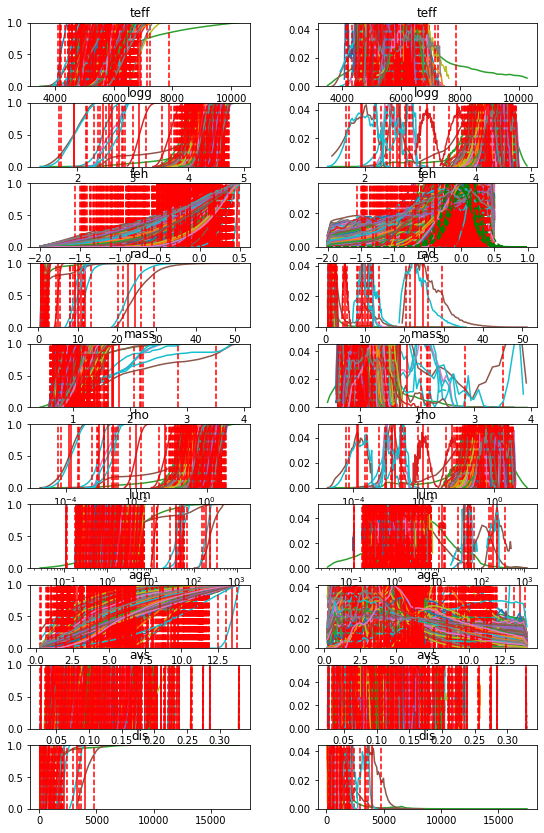

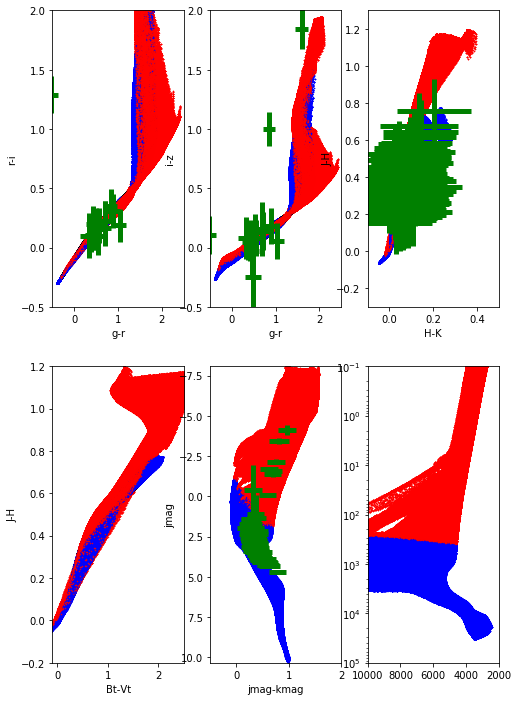

In [17]:
for kepasid,row in cks_dat.iterrows():
    if row['kepid'] not in list(Dens_ic.keys()) and not np.isnan(row['kepid']):
        #try:
        if 1==1:
            rho_ic,rho_iso = starpars.getStellarDensity(row['kepid'], mission='Kepler')
            print(str(row['kepid']))
            if rho_iso is not None:
                print('|IC:{0:7.3f}±{1:5.3f} | iso:{2:7.3f}±{3:5.3f} | true:{4:7.3f}+{5:5.3f}-{6:5.3f}'.format(rho_ic[0],0.5*(abs(rho_ic[1])+abs(rho_ic[2])),
                                                                                                           rho_iso[0],0.5*(abs(rho_iso[1])+abs(rho_iso[2])),
                                                                                                           row['rho'],row['ep_rho'],row['em_rho']))
            else:
                print('|IC:{0:7.3f}±{1:5.3f} | iso:None | true:{2:7.3f}+{3:5.3f}-{4:5.3f}'.format(rho_ic[0],0.5*(abs(rho_ic[1])+abs(rho_ic[2])),
                                                                                                           row['rho'],row['ep_rho'],row['em_rho']))

            Dens_ic[row['kepid']]=[rho_ic]
            Dens_iso[row['kepid']]=[rho_iso]
            Dens_off[row['kepid']]=[row['rho'],-1*abs(row['em_rho']),row['ep_rho']]
        #except:
        #    print(kepasid)


In [203]:
Dens_iso[()][key][0][0]

0.19065308067853767

In [365]:
all_dens=pd.DataFrame()
for nk, key in enumerate(Dens_iso[()].keys()):
    dic={'dens_ic':Dens_ic[nk,0],'dens_ic_em':Dens_ic[nk,1],'dens_ic_ep':Dens_ic[nk,2]}
    if Dens_iso[()][key][0] is not None:
        dic.update({'dens_iso':1.411*Dens_iso[()][key][0][0],
                    'dens_iso_em':1.411*Dens_iso[()][key][0][1],
                    'dens_iso_ep':1.411*Dens_iso[()][key][0][2]})
    else:
        dic.update({'dens_iso':np.nan,
                    'dens_iso_em':np.nan,
                    'dens_iso_ep':np.nan})
    if Dens_off[()][key][0] is not None:
        dic.update({'dens_real':Dens_off[()][key][0],
                    'dens_real_em':Dens_off[()][key][1],
                    'dens_real_ep':Dens_off[()][key][2]})
    else:
        dic.update({'dens_real':np.nan,
                    'dens_real_em':np.nan,
                    'dens_real_ep':np.nan})
    all_dens=all_dens.append(pd.Series(dic,name=key))
all_dens.to_csv("stellar/Densities_as_found_by_starpars.csv")

In [366]:
new_all_dens=pd.DataFrame()
for key in all_dens.columns:
    if '_em' in key:
        newarr=np.log10(all_dens[key[:-3]])-np.log10(all_dens[key[:-3]]-abs(all_dens[key]))
    elif '_ep' in key:
        newarr=np.log10(all_dens[key[:-3]]+abs(all_dens[key]))-np.log10(all_dens[key[:-3]])
    else:
        newarr=np.log10(all_dens[key])
    new_all_dens['log_'+key]=newarr


In [367]:
all_dens=pd.merge(all_dens,new_all_dens,left_index=True,right_index=True)
all_dens.to_csv("stellar/Densities_as_found_by_starpars.csv")

In [368]:
def weighted_avg_and_std(values, errs):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    try:
        errs[errs/errs!=1.0]=np.nan
        weights=errs**-1
        nonans=((values/values==1.0)&(errs/errs==1.0))
        if nonans.sum()>0:
            average = np.average(values[nonans], weights=weights[nonans])
            # Fast and numerically precise:
            std = np.sqrt(np.average((values[nonans]-average)**2, weights=weights[nonans]))
            if std==0.0:
                std=np.nanmin(errs)
            return (average, std)
        else:
            return (np.nan,np.nan)
    except:
        print(values,errs)

In [369]:
key=all_dens.index.values[0]

In [370]:
weighted_avg_and_std(all_dens.loc[key,['dens_iso','dens_ic']].values,np.array([0.5*(abs(all_dens.loc[key,'dens_iso_em'])+abs(all_dens.loc[key,'dens_iso_ep'])),0.5*(abs(all_dens.loc[key,'dens_ic_em'])+abs(all_dens.loc[key,'dens_ic_ep']))]))

(0.27524579531633625, 0.0026821426438293212)

In [371]:
Av_std_wtd=[weighted_avg_and_std(all_dens.loc[key,['dens_iso','dens_ic']].values,np.array([0.5*(abs(all_dens.loc[key,'dens_iso_em'])+abs(all_dens.loc[key,'dens_iso_ep'])),0.5*(abs(all_dens.loc[key,'dens_ic_em'])+abs(all_dens.loc[key,'dens_ic_ep']))])) for key in all_dens.index.values]

all_dens['dens_wtd_av']=np.vstack(Av_std_wtd)[:,0]
all_dens['dens_wtd_av_em']=-1*np.vstack(Av_std_wtd)[:,1]
all_dens['dens_wtd_av_ep']=np.vstack(Av_std_wtd)[:,1]

Av_std_wtd=[weighted_avg_and_std(all_dens.loc[key,['log_dens_iso','log_dens_ic']].values,np.array([0.5*(abs(all_dens.loc[key,'log_dens_iso_em'])+abs(all_dens.loc[key,'log_dens_iso_ep'])),0.5*(abs(all_dens.loc[key,'log_dens_ic_em'])+abs(all_dens.loc[key,'log_dens_ic_ep']))])) for key in all_dens.index.values]

all_dens['log_then_av_dens']=np.vstack(Av_std_wtd)[:,0]
all_dens['log_then_av_dens_em']=-1*np.vstack(Av_std_wtd)[:,1]
all_dens['log_then_av_dens_ep']=np.vstack(Av_std_wtd)[:,1]

Av_std_wtd=[weighted_avg_and_std(all_dens.loc[key,['dens_iso','dens_ic']].values,np.array([0.5*(abs(all_dens.loc[key,'dens_iso_em'])+abs(all_dens.loc[key,'dens_iso_ep'])),0.5*(abs(all_dens.loc[key,'dens_ic_em'])+abs(all_dens.loc[key,'dens_ic_ep']))])) for key in all_dens.index.values]

all_dens['av_then_log_dens']=np.log10(np.vstack(Av_std_wtd)[:,0])
all_dens['av_then_log_dens_em']=all_dens['av_then_log_dens']-np.log10(np.vstack(Av_std_wtd)[:,0]-np.vstack(Av_std_wtd)[:,1])
all_dens['av_then_log_dens_ep']=np.log10(np.vstack(Av_std_wtd)[:,0]+np.vstack(Av_std_wtd)[:,1])-all_dens['av_then_log_dens']


In [372]:
all_dens['source']=np.tile('',len(all_dens))
all_dens.loc[np.in1d(all_dens.index.values,kepas['KIC'].values),'source']='AS'
all_dens.loc[np.in1d(all_dens.index.values,cks_dat['kepid'].values),'source']='CKS'

In [373]:
all_dens

,dens_ic,dens_ic_em,dens_ic_ep,dens_iso,dens_iso_em,dens_iso_ep,dens_real,dens_real_em,dens_real_ep,log_dens_ic,...,dens_wtd_av,dens_wtd_av_em,dens_wtd_av_ep,log_then_av_dens,log_then_av_dens_em,log_then_av_dens_ep,av_then_log_dens,av_then_log_dens_em,av_then_log_dens_ep,source
1435467.0,0.276400,-0.021325,0.020716,0.269011,0.104453,0.122683,0.284121,-0.024012,0.025936,-0.558462,...,0.275246,-0.002682,0.002682,-0.560223,-0.004197,0.004197,-0.560279,0.004253,0.004212,AS
2837475.0,0.335861,-0.012169,0.019114,0.287546,0.073108,0.094264,0.337746,-0.029905,0.032447,-0.473840,...,0.328253,-0.017599,0.017599,-0.483140,-0.023255,0.023255,-0.483792,0.023931,0.022681,AS
3427720.0,0.794472,-0.040050,0.047002,0.652413,0.132874,0.126644,0.800639,-0.030858,0.032091,-0.099921,...,0.758789,-0.061610,0.061610,-0.118086,-0.034988,0.034988,-0.119879,0.036777,0.033904,AS
3656476.0,0.469029,-0.021120,0.022119,0.455334,0.091019,0.075954,0.476533,-0.018141,0.018645,-0.328800,...,0.466212,-0.005536,0.005536,-0.331327,-0.005112,0.005112,-0.331416,0.005188,0.005126,AS
3735871.0,0.809355,-0.062884,0.068164,0.770294,0.247060,0.378562,0.847813,-0.054522,0.057631,-0.091861,...,0.802590,-0.014781,0.014781,-0.095525,-0.008080,0.008080,-0.095506,0.008073,0.007926,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661893.0,1.285613,-0.296882,0.433877,1.224469,0.297526,0.405278,0.951138,-0.106825,0.122272,0.109110,...,1.254445,-0.030566,0.030566,0.098633,-0.010581,0.010581,0.098452,0.010713,0.010455,CKS
8773015.0,0.223175,-0.076896,0.333735,0.733660,0.198012,0.200576,0.640658,-0.071954,0.082359,-0.651354,...,0.482216,-0.255214,0.255214,-0.286369,-0.235431,0.235431,-0.316758,0.327212,0.184479,CKS
6290935.0,0.360879,-0.117364,0.328349,NaN,NaN,NaN,0.307875,-0.034578,0.039578,-0.442639,...,0.360879,-0.222856,0.222856,-0.442639,-0.225918,0.225918,-0.442639,0.417411,0.208854,CKS
10722485.0,0.853296,-0.263785,0.545854,0.428271,0.086395,0.106184,0.285977,-0.032119,0.036763,-0.068901,...,0.509941,-0.167456,0.167456,-0.266260,-0.141897,0.141897,-0.292480,0.172879,0.123324,CKS


In [284]:
all_dens.to_csv("stellar/Densities_as_found_by_starpars.csv")

In [291]:
sns.set_palette('viridis',4)

In [315]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate


In [364]:
all_dens

,dens_ic,dens_ic_em,dens_ic_ep,dens_iso,dens_iso_em,dens_iso_ep,dens_real,dens_real_em,dens_real_ep,log_dens_ic,...,dens_wtd_av,dens_wtd_av_em,dens_wtd_av_ep,log_then_av_dens,log_then_av_dens_em,log_then_av_dens_ep,av_then_log_dens,av_then_log_dens_em,av_then_log_dens_ep,source
1435467.0,AS,AS,AS,AS,AS,AS,AS,AS,AS,AS,...,AS,AS,AS,AS,AS,AS,AS,AS,AS,AS
2837475.0,AS,AS,AS,AS,AS,AS,AS,AS,AS,AS,...,AS,AS,AS,AS,AS,AS,AS,AS,AS,AS
3427720.0,AS,AS,AS,AS,AS,AS,AS,AS,AS,AS,...,AS,AS,AS,AS,AS,AS,AS,AS,AS,AS
3656476.0,AS,AS,AS,AS,AS,AS,AS,AS,AS,AS,...,AS,AS,AS,AS,AS,AS,AS,AS,AS,AS
3735871.0,AS,AS,AS,AS,AS,AS,AS,AS,AS,AS,...,AS,AS,AS,AS,AS,AS,AS,AS,AS,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7661893.0,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,...,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS
8773015.0,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,...,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS
6290935.0,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,...,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS
10722485.0,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,...,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS,CKS


In [333]:
from statsmodels.nonparametric.kde import KDEUnivariate

x_grid=np.linspace(-5,5,0.005)
np.random.normal(all_dens['log_dens_ic'].values,0.5*(abs(all_dens['log_dens_ic_em'].values)+abs(all_dens['log_dens_ic_ep'].values)),400)
x=np.log10(all_dens['dens_ic'].values/all_dens['dens_real'].values)
kde = KDEUnivariate(np.sort(x))
kde.fit(bw=0.3)
out=kde.evaluate(x_grid)

In [334]:
out

array([], dtype=float64)

In [326]:
out

array([], dtype=float64)

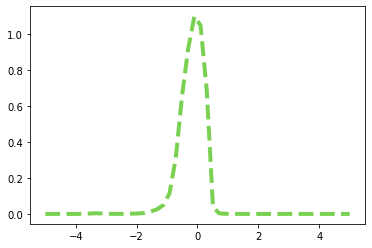

In [342]:
import scipy.stats as sts
resamples=np.random.normal(all_dens['log_dens_ic'].values,0.5*(abs(all_dens['log_dens_ic_em'].values)+abs(all_dens['log_dens_ic_ep'].values)),(400,len(all_dens))).ravel()
x = np.linspace(-5,5)
rkde = sts.gaussian_kde(resamples)
plt.plot(x, rkde.pdf(x), '--', c='C3', lw=4, label='resampled KDE')


IC: 0.6436574003693853  average err: 0.2841467152440435  average prec: 0.041931917614630915
ISO: 0.5664634768937987  average err: 0.29011137993779335  average prec: 0.05550909664201386
wtd av: 0.5379430895363432  average err: 0.09806576044168441  average prec: 0.031524715656459985


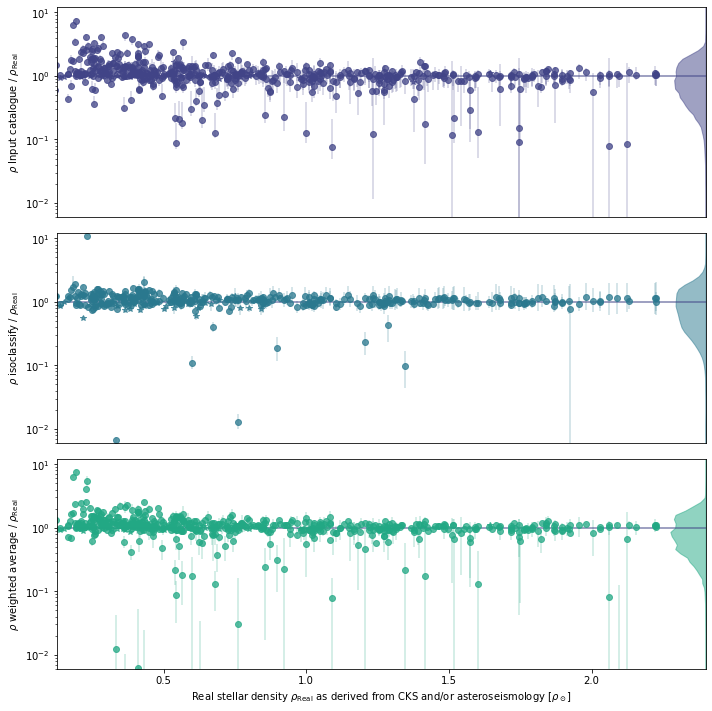

In [378]:
from matplotlib import ticker
import scipy.stats as sts

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(311)
ax1 = fig.add_subplot(312)
ax2 = fig.add_subplot(313)

markers3, caps3, bars3 = ax.errorbar(all_dens.loc[all_dens['source']=='AS','dens_real'],all_dens.loc[all_dens['source']=='AS','dens_ic']/all_dens.loc[all_dens['source']=='AS','dens_real'],
             yerr=[abs(all_dens.loc[all_dens['source']=='AS','dens_ic_em']),abs(all_dens.loc[all_dens['source']=='AS','dens_ic_ep'])],
             fmt='*',color=sns.color_palette()[0],alpha=0.75)
[bar.set_alpha(0.25) for bar in bars3]
markers3, caps3, bars3 = ax.errorbar(all_dens.loc[all_dens['source']=='CKS','dens_real'],all_dens.loc[all_dens['source']=='CKS','dens_ic']/all_dens.loc[all_dens['source']=='CKS','dens_real'],
             yerr=[abs(all_dens.loc[all_dens['source']=='CKS','dens_ic_em']),abs(all_dens.loc[all_dens['source']=='CKS','dens_ic_ep'])],
             fmt='o',color=sns.color_palette()[0],alpha=0.75)
[bar.set_alpha(0.25) for bar in bars3]
print("IC:",np.std(all_dens['dens_ic']/all_dens['dens_real']),
      " average err:",np.nanmedian((0.5*(abs(all_dens['dens_ic_ep'])+abs(all_dens['dens_ic_ep']))/all_dens['dens_ic'])),
      " average prec:",np.nanmedian((all_dens['dens_ic']-all_dens['dens_real'])/all_dens['dens_real']))


resamples=np.random.normal(all_dens['log_dens_ic'].values,0.5*(abs(all_dens['log_dens_ic_em'].values)+abs(all_dens['log_dens_ic_ep'].values)),(400,len(all_dens))).ravel()
x = np.linspace(np.log10(0.006),np.log10(12))
rkde = sts.gaussian_kde(resamples[resamples/resamples==1.0])
toplot=rkde.pdf(x)
ax.fill_betweenx(np.power(10,x),np.tile(2.4,len(x)),2.4-0.1*toplot,color=sns.color_palette()[0],alpha=0.5)

plt.plot(x, rkde.pdf(x), '--', c='C3', lw=4, label='resampled KDE')


ax.plot([0.001,2.5],[1.0,1.0],'-',linewidth=2.0,alpha=0.5)
ax.set_xlim(0.125,2.4)
ax.set_xticks([])
ax.set_ylim(0.006,12)
ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_ylabel(r"$\rho$ Input catalogue / $\rho_{\rm Real}$")


markers3, caps3, bars3 = ax1.errorbar(all_dens.loc[all_dens['source']=='AS','dens_real'],all_dens.loc[all_dens['source']=='AS','dens_iso']/all_dens.loc[all_dens['source']=='AS','dens_real'],
             yerr=[abs(all_dens.loc[all_dens['source']=='AS','dens_iso_em']),abs(all_dens.loc[all_dens['source']=='AS','dens_iso_ep'])],
             fmt='*',color=sns.color_palette()[1],alpha=0.75)
[bar.set_alpha(0.25) for bar in bars3]
markers3, caps3, bars3 = ax1.errorbar(all_dens.loc[all_dens['source']=='CKS','dens_real'],all_dens.loc[all_dens['source']=='CKS','dens_iso']/all_dens.loc[all_dens['source']=='CKS','dens_real'],
             yerr=[abs(all_dens.loc[all_dens['source']=='CKS','dens_iso_em']),abs(all_dens.loc[all_dens['source']=='CKS','dens_iso_ep'])],
             fmt='o',color=sns.color_palette()[1],alpha=0.75)
[bar.set_alpha(0.25) for bar in bars3]
print("ISO:",np.std(all_dens['dens_iso']/all_dens['dens_real']),
      " average err:",np.nanmedian((0.5*(abs(all_dens['dens_iso_ep'])+abs(all_dens['dens_iso_ep']))/all_dens['dens_iso'])),
      " average prec:",np.nanmedian((all_dens['dens_iso']-all_dens['dens_real'])/all_dens['dens_real']))
ax1.plot([0.001,2.5],[1.0,1.0],'-',linewidth=2.0,alpha=0.5)
ax1.set_xlim(0.125,2.4)
ax1.set_xticks([])
ax1.set_ylim(0.006,12)
ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_ylabel(r"$\rho$ isoclassify / $\rho_{\rm Real}$")

resamples=np.random.normal(all_dens['log_dens_iso'].values,0.5*(abs(all_dens['log_dens_iso_em'].values)+abs(all_dens['log_dens_iso_ep'].values)),(400,len(all_dens))).ravel()
x = np.linspace(np.log10(0.006),np.log10(12))
rkde = sts.gaussian_kde(resamples[resamples/resamples==1.0])
toplot=rkde.pdf(x)
ax1.fill_betweenx(np.power(10,x),np.tile(2.4,len(x)),2.4-0.1*toplot,color=sns.color_palette()[1],alpha=0.5)


ax2.cla()
markers3, caps3, bars3 = ax2.errorbar(all_dens.loc[all_dens['source']=='AS','dens_real'],all_dens.loc[all_dens['source']=='AS','dens_wtd_av']/all_dens.loc[all_dens['source']=='AS','dens_real'],
             yerr=[abs(all_dens.loc[all_dens['source']=='AS','dens_wtd_av_em']),abs(all_dens.loc[all_dens['source']=='AS','dens_wtd_av_ep'])],
             fmt='*',color=sns.color_palette()[2],alpha=0.75)
[bar.set_alpha(0.25) for bar in bars3]
markers3, caps3, bars3 = ax2.errorbar(all_dens.loc[all_dens['source']=='CKS','dens_real'],all_dens.loc[all_dens['source']=='CKS','dens_wtd_av']/all_dens.loc[all_dens['source']=='CKS','dens_real'],
             yerr=[abs(all_dens.loc[all_dens['source']=='CKS','dens_wtd_av_em']),abs(all_dens.loc[all_dens['source']=='CKS','dens_wtd_av_ep'])],
             fmt='o',color=sns.color_palette()[2],alpha=0.75)
[bar.set_alpha(0.25) for bar in bars3]

print("wtd av:",np.nanstd(all_dens['dens_wtd_av']/all_dens['dens_real']),
      " average err:",np.nanmedian(all_dens['dens_wtd_av_ep']/all_dens['dens_wtd_av']),
      " average prec:",np.nanmedian((all_dens['dens_wtd_av']-all_dens['dens_real'])/all_dens['dens_real']))

ax2.plot([0.001,2.5],[1.0,1.0],'-',linewidth=2.0,alpha=0.5)
ax2.set_xlim(0.125,2.4)
ax2.set_ylim(0.006,12)
ax2.set_yscale('log')

resamples=np.random.normal(all_dens['av_then_log_dens'].values,0.5*(abs(all_dens['av_then_log_dens_em'].values)+abs(all_dens['av_then_log_dens_ep'].values)),(400,len(all_dens))).ravel()
x = np.linspace(np.log10(0.006),np.log10(12))
rkde = sts.gaussian_kde(resamples[resamples/resamples==1.0])
toplot=rkde.pdf(x)
ax2.fill_betweenx(np.power(10,x),np.tile(2.4,len(x)),2.4-0.1*toplot,color=sns.color_palette()[2],alpha=0.5)


#ax2.set_xscale('log')
ax2.set_xlabel(r"Real stellar density $\rho_{\rm Real}$ as derived from CKS and/or asteroseismology [$\rho_\odot$]")
ax2.set_ylabel(r"$\rho$ weighted average / $\rho_{\rm Real}$ ")
fig.tight_layout()
fig.savefig("stellar/Density_comparison_real.png",dpi=300)
fig.savefig("stellar/Density_comparison_real.pdf")

In [385]:
print("IC/AS:",np.std(all_dens.loc[all_dens.source=='AS','dens_ic']/all_dens.loc[all_dens.source=='AS','dens_real']),
      " average err:",np.nanmedian((0.5*(abs(all_dens.loc[all_dens.source=='AS','dens_ic_ep'])+abs(all_dens.loc[all_dens.source=='AS','dens_ic_ep']))/all_dens.loc[all_dens.source=='AS','dens_ic'])),
      " average prec:",np.nanmedian((all_dens.loc[all_dens.source=='AS','dens_ic']-all_dens.loc[all_dens.source=='AS','dens_real'])/all_dens.loc[all_dens.source=='AS','dens_real']))
print("IC/CKS:",np.std(all_dens.loc[all_dens.source=='CKS','dens_ic']/all_dens.loc[all_dens.source=='CKS','dens_real']),
      " average err:",np.nanmedian((0.5*(abs(all_dens.loc[all_dens.source=='CKS','dens_ic_ep'])+abs(all_dens.loc[all_dens.source=='CKS','dens_ic_ep']))/all_dens.loc[all_dens.source=='CKS','dens_ic'])),
      " average prec:",np.nanmedian((all_dens.loc[all_dens.source=='CKS','dens_ic']-all_dens.loc[all_dens.source=='CKS','dens_real'])/all_dens.loc[all_dens.source=='CKS','dens_real']))

print("ISO/AS:",np.std(all_dens.loc[all_dens['source']=='AS','dens_iso']/all_dens.loc[all_dens['source']=='AS','dens_real']),
      " average err:",np.nanmedian((0.5*(abs(all_dens.loc[all_dens['source']=='AS','dens_iso_ep'])+abs(all_dens.loc[all_dens['source']=='AS','dens_iso_ep']))/all_dens.loc[all_dens['source']=='AS','dens_iso'])),
      " average prec:",np.nanmedian((all_dens.loc[all_dens['source']=='AS','dens_iso']-all_dens.loc[all_dens['source']=='AS','dens_real'])/all_dens.loc[all_dens['source']=='AS','dens_real']))
print("ISO/CKS:",np.std(all_dens.loc[all_dens['source']=='CKS','dens_iso']/all_dens.loc[all_dens['source']=='CKS','dens_real']),
      " average err:",np.nanmedian((0.5*(abs(all_dens.loc[all_dens['source']=='CKS','dens_iso_ep'])+abs(all_dens.loc[all_dens['source']=='CKS','dens_iso_ep']))/all_dens.loc[all_dens['source']=='CKS','dens_iso'])),
      " average prec:",np.nanmedian((all_dens.loc[all_dens['source']=='CKS','dens_iso']-all_dens.loc[all_dens['source']=='CKS','dens_real'])/all_dens.loc[all_dens['source']=='CKS','dens_real']))

print("wtd av/AS:",np.nanstd(all_dens.loc[all_dens['source']=='AS','dens_wtd_av']/all_dens.loc[all_dens['source']=='AS','dens_real']),
      " average err:",np.nanmedian(all_dens.loc[all_dens['source']=='AS','dens_wtd_av_ep']/all_dens.loc[all_dens['source']=='AS','dens_wtd_av']),
      " average prec:",np.nanmedian((all_dens.loc[all_dens['source']=='AS','dens_wtd_av']-all_dens.loc[all_dens['source']=='AS','dens_real'])/all_dens.loc[all_dens['source']=='AS','dens_real']))
print("wtd av/CKS:",np.nanstd(all_dens.loc[all_dens['source']=='CKS','dens_wtd_av']/all_dens.loc[all_dens['source']=='CKS','dens_real']),
      " average err:",np.nanmedian(all_dens.loc[all_dens['source']=='CKS','dens_wtd_av_ep']/all_dens.loc[all_dens['source']=='CKS','dens_wtd_av']),
      " average prec:",np.nanmedian((all_dens.loc[all_dens['source']=='CKS','dens_wtd_av']-all_dens.loc[all_dens['source']=='CKS','dens_real'])/all_dens.loc[all_dens['source']=='CKS','dens_real']))


IC/AS: 0.10954436695368798  average err: 0.059268799846171394  average prec: 0.00031341397484829504
IC/CKS: 0.6748000974121647  average err: 0.3353072733857737  average prec: 0.05631473036158002
ISO/AS: 0.180290759929183  average err: 0.2911675830886512  average prec: -0.09220295635725281
ISO/CKS: 0.5925083500371834  average err: 0.2896822679317896  average prec: 0.07496717602520661
wtd av/AS: 0.061605565779056105  average err: 0.0545062437204454  average prec: -0.01860198330407015
wtd av/CKS: 0.5647036322176425  average err: 0.11338434462229671  average prec: 0.0530586588569935


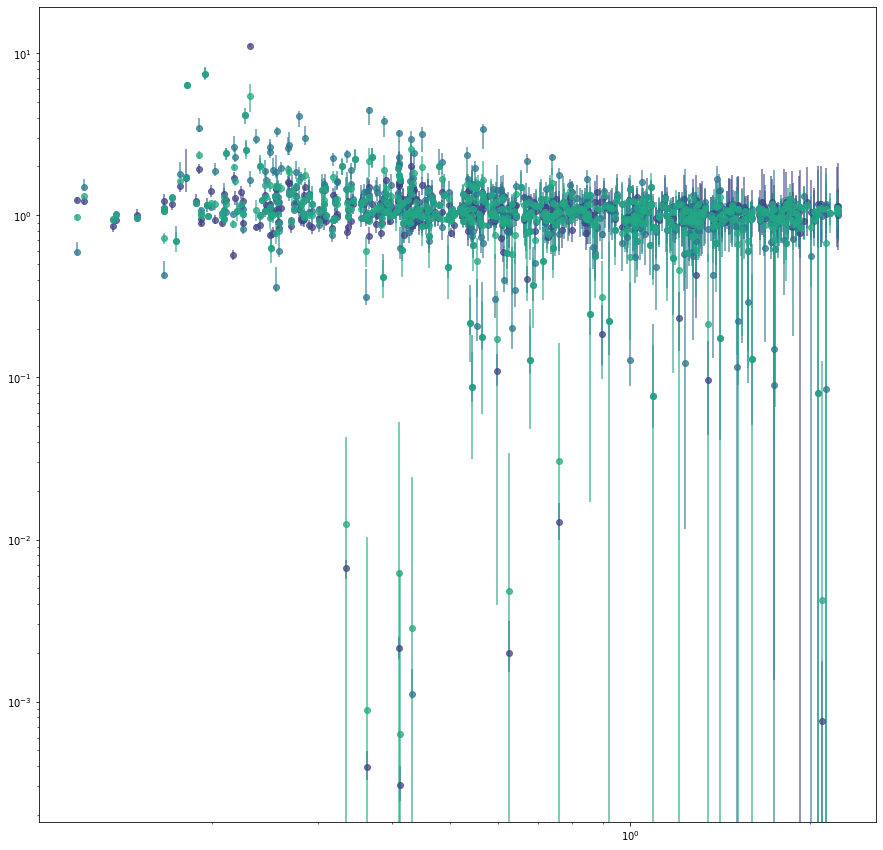

In [384]:
plt.figure(figsize=(15,15))
plt.errorbar(all_dens['dens_real'],all_dens['dens_iso']/all_dens['dens_real'],
             yerr=[abs(all_dens['dens_iso_em']),abs(all_dens['dens_iso_ep'])],
             fmt='o',color=sns.color_palette()[0],alpha=0.75)
plt.errorbar(all_dens['dens_real'],all_dens['dens_ic']/all_dens['dens_real'],
             yerr=[abs(all_dens['dens_ic_em']),abs(all_dens['dens_ic_ep'])],
             fmt='o',color=sns.color_palette()[1],alpha=0.75)
plt.errorbar(all_dens['dens_real'],all_dens['dens_wtd_av']/all_dens['dens_real'],
             yerr=[abs(all_dens['dens_wtd_av_em']),abs(all_dens['dens_wtd_av_ep'])],
             fmt='o',color=sns.color_palette()[2],alpha=0.75)

plt.xscale('log')
plt.yscale('log')

In [ ]:
fig.savefig

In [358]:
ax2.cla()

In [352]:
sts.gaussian_kde?

In [347]:
plt.fill_betweenx?

In [ ]:
ax.get_xaxis

TypeError: object of type 'AxesSubplot' has no len()

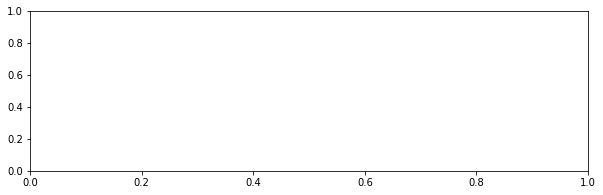

In [306]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(311)

len(ax)

In [265]:
all_dens['dens_wtd_av']

1435467.0    NaN
2837475.0    NaN
3427720.0    NaN
3656476.0    NaN
3735871.0    NaN
              ..
7661893.0    NaN
8773015.0    NaN
6290935.0    NaN
10722485.0   NaN
9286088.0    NaN
Name: dens_wtd_av, Length: 556, dtype: float64

In [52]:
#Dens_ic_arr=[Dens_ic[()][kid] for kid in Dens_ic[()]]
Dens_iso_arr=np.vstack([Dens_iso[()][kid] if Dens_iso[()][kid][0] is not None else [np.array([0,0,0])] for kid in Dens_iso[()]])
Dens_off_arr=np.vstack([Dens_off[()][kid] for kid in Dens_off[()]])

In [53]:
Dens_ic_arr=Dens_ic[:,:]

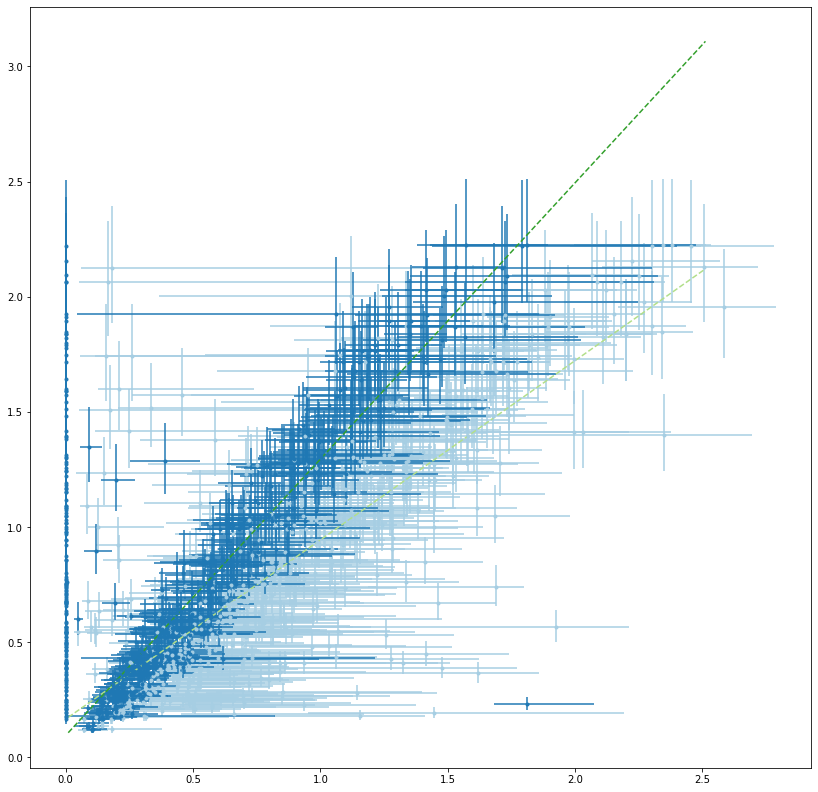

In [83]:
plt.figure(figsize=(14,14))
plt.errorbar(Dens_ic_arr[:,0],Dens_off_arr[:,0],
             xerr=[abs(Dens_ic_arr[:,1]),abs(Dens_ic_arr[:,2])],
             yerr=[abs(Dens_off_arr[:,1]),abs(Dens_off_arr[:,2])],fmt='.')
plt.errorbar(Dens_iso_arr[:,0],Dens_off_arr[:,0],
             xerr=[abs(Dens_iso_arr[:,1]),abs(Dens_iso_arr[:,2])],
             yerr=[abs(Dens_off_arr[:,1]),abs(Dens_off_arr[:,2])],fmt='.')

Av_std_wtd=[weighted_avg_and_std(np.array([Dens_iso_arr[n,0],Dens_ic_arr[n,0]]), np.array([0.5*(abs(Dens_iso_arr[n,1])+abs(Dens_iso_arr[n,2])),0.5*(abs(Dens_ic_arr[n,1])+abs(Dens_ic_arr[n,2]))])) for n in range(len(Dens_iso_arr))]
Averaged_dens=np.vstack(Av_std_wtd)
#plt.errorbar(Averaged_dens[:,0],Dens_off_arr[:,0],xerr=Averaged_dens[:,1],yerr=[Dens_off_arr[:,1],Dens_off_arr[:,2]],fmt='.')

dens_to_fit=np.logspace(-2,0.4,10)
plt.plot(dens_to_fit,np.polyval(np.polyfit(Dens_ic_arr[:,0],Dens_off_arr[:,0],1),dens_to_fit),'--')
plt.plot(dens_to_fit,np.polyval(np.polyfit(Dens_iso_arr[Dens_iso_arr[:,0]>0.0,0],Dens_off_arr[Dens_iso_arr[:,0]>0.0,0],1),dens_to_fit),'--')

#plt.xscale('log')
#plt.yscale('log')


In [181]:
from BCES import bces
import seaborn as sns
sns.set_palette("Paired")

In [127]:
log_Densoff_arr=np.column_stack((np.log10(Dens_off_arr[:,0]),
                                 np.log10(Dens_off_arr[:,0])-np.log10(Dens_off_arr[:,0]-abs(Dens_off_arr[:,1])),
                                 np.log10(Dens_off_arr[:,0]+abs(Dens_off_arr[:,2]))-np.log10(Dens_off_arr[:,0])))
log_Densic_arr=np.column_stack((np.log10(Dens_ic_arr[:,0]),
                                 np.log10(Dens_ic_arr[:,0])-np.log10(Dens_ic_arr[:,0]-abs(Dens_ic_arr[:,1])),
                                 np.log10(Dens_ic_arr[:,0]+abs(Dens_ic_arr[:,2]))-np.log10(Dens_ic_arr[:,0])))
log_Densiso_arr=np.column_stack((np.log10(Dens_iso_arr[:,0]),
                                 np.log10(Dens_iso_arr[:,0])-np.log10(Dens_iso_arr[:,0]-abs(Dens_iso_arr[:,1])),
                                 np.log10(Dens_iso_arr[:,0]+abs(Dens_iso_arr[:,2]))-np.log10(Dens_iso_arr[:,0])))

In [160]:
log_Densiso_arr[:,0]=log_Densiso_arr[:,0]+np.log10(1.411)

(-1.5, 0.7)

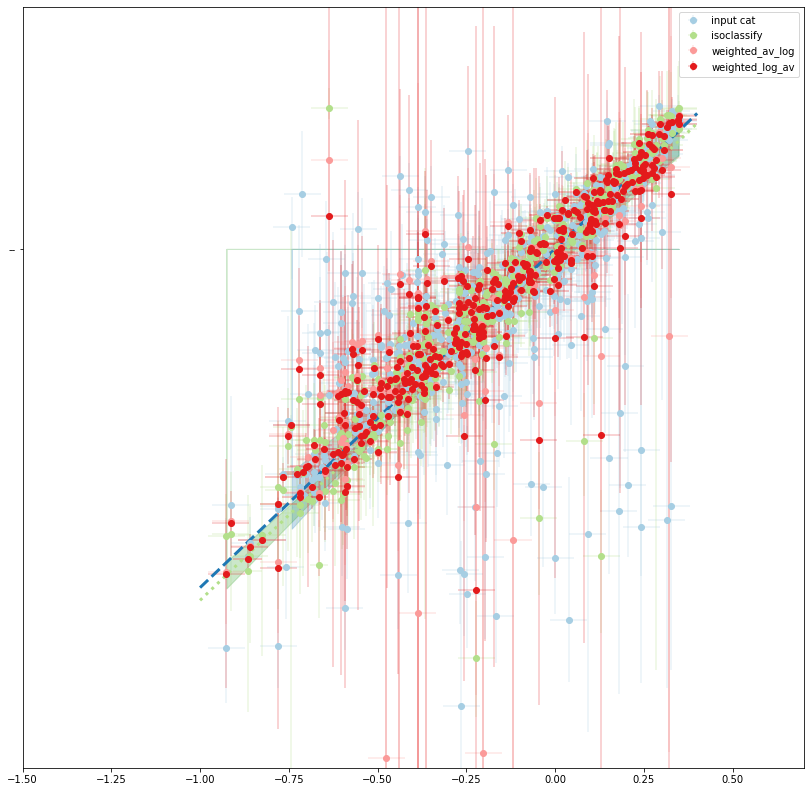

In [191]:
plt.figure(figsize=(14,14))

a,b,aerr,berr,covab=bces.bces.bces(log_Densoff_arr[:,0],np.clip(0.5*(abs(log_Densoff_arr[:,1])+abs(log_Densoff_arr[:,2])),0.03,1.0),
                                   log_Densic_arr[:,0],np.clip(0.5*(abs(log_Densic_arr[:,1])+abs(log_Densic_arr[:,2])),0.03,1.0),
                                   np.zeros(len(log_Densoff_arr)))

xarr=np.array([-1,-0.5,0.0,0.4])
#plt.plot(xarr,a[0]*xarr+b[0],'-.',color='k')
#plt.plot(xarr,a[1]*xarr+b[1],':',color='k')
#plt.plot(xarr,a[2]*xarr+b[2],'-',color='k')
plt.plot(xarr,a[3]*xarr+b[3],'--',color=sns.color_palette()[1],linewidth=3.0)

plt.fill_between([np.min(log_Densoff_arr[log_Densic_arr[:,0]>0.0,0]),np.max(log_Densoff_arr[log_Densic_arr[:,0]>0.0,0]),np.max(log_Densoff_arr[log_Densic_arr[:,0]>0.0,0]),np.min(log_Densoff_arr[log_Densic_arr[:,0]>0.0,0])],
            [np.polyval([a[3]+aerr[3],b[3]+berr[3]],np.min(log_Densoff_arr[log_Densic_arr[:,0]>0.0,0])),
             np.polyval([a[3]+aerr[3],b[3]+berr[3]],np.max(log_Densoff_arr[log_Densic_arr[:,0]>0.0,0])),
             np.polyval([a[3]-aerr[3],b[3]-berr[3]],np.max(log_Densoff_arr[log_Densic_arr[:,0]>0.0,0])),
             np.polyval([a[3]-aerr[3],b[3]-berr[3]],np.min(log_Densoff_arr[log_Densic_arr[:,0]>0.0,0]))],
            '--',color=sns.color_palette()[1],alpha=0.25)

a,b,aerr,berr,covab=bces.bces.bces(log_Densoff_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1.0,0],
                                   np.clip(0.5*(abs(log_Densoff_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1,1])+abs(log_Densoff_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1,2])),0.03,1.0),
                                   log_Densiso_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1.0,0],
                                   np.clip(0.5*(abs(log_Densiso_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1,1])+abs(log_Densiso_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1,2])),0.03,1.0),
                                   np.zeros(len(log_Densoff_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1.0,0])))

plt.plot(xarr,a[0]*xarr+b[0],':',color=sns.color_palette()[2],linewidth=3.0)

isominmax=[np.min(log_Densoff_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1.0,0]),np.max(log_Densoff_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1.0,0]),
           np.max(log_Densoff_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1.0,0]),np.min(log_Densoff_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1.0,0])]
plt.fill_between([np.min(log_Densoff_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1.0,0]),np.max(log_Densoff_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1.0,0]),np.max(log_Densoff_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1.0,0]),np.min(log_Densoff_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1.0,0])],
[np.polyval([a[0]+aerr[0],b[0]+berr[0]],np.min(log_Densoff_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1.0,0])),
 np.polyval([a[0]+aerr[0],b[0]+berr[0]],np.max(log_Densoff_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1.0,0])),
 np.polyval([a[0]-aerr[0],b[0]-berr[0]],np.max(log_Densoff_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1.0,0])),
 np.polyval([a[0]-aerr[0],b[0]-berr[0]],np.min(log_Densoff_arr[log_Densiso_arr[:,0]/log_Densiso_arr[:,0]==1.0,0]))],
color=sns.color_palette()[3],alpha=0.25)

#plt.plot(log_Densic_arr[:,0],log_Densoff_arr[:,0],'.',color=sns.color_palette()[0],label="input cat")
#plt.plot(log_Densiso_arr[:,0],log_Densoff_arr[:,0],'.',color=sns.color_palette()[2],label="isoclassify")
markers1, caps1, bars1 = plt.errorbar(log_Densoff_arr[:,0],log_Densic_arr[:,0],
             yerr=[abs(log_Densic_arr[:,1]),abs(log_Densic_arr[:,2])],
             xerr=[abs(log_Densoff_arr[:,1]),abs(log_Densoff_arr[:,2])],
             fmt='o',color=sns.color_palette()[0],label="input cat")

markers2, caps2, bars2 = plt.errorbar(log_Densoff_arr[:,0],log_Densiso_arr[:,0],
             yerr=[abs(log_Densiso_arr[:,1]),abs(log_Densiso_arr[:,2])],
             xerr=[abs(log_Densoff_arr[:,1]),abs(log_Densoff_arr[:,2])],
             fmt='o',color=sns.color_palette()[2],label="isoclassify")

Av_std_wtd=[weighted_avg_and_std(np.array([log_Densiso_arr[n,0],log_Densic_arr[n,0]]), np.array([0.5*(abs(log_Densiso_arr[n,1])+abs(log_Densiso_arr[n,2])),0.5*(abs(log_Densic_arr[n,1])+abs(log_Densic_arr[n,2]))])) for n in range(len(log_Densiso_arr))]
averaged_log_dens=np.vstack(Av_std_wtd)

markers3, caps3, bars3 = plt.errorbar(log_Densoff_arr[:,0],averaged_log_dens[:,0],
                                      yerr=averaged_log_dens[:,1],
                                      xerr=[log_Densoff_arr[:,1],log_Densoff_arr[:,2]],
                                      fmt='o',color=sns.color_palette()[4],label='weighted_av_log')

Av_std_wtd=[weighted_avg_and_std(np.array([Dens_iso_arr[n,0]*1.411,Dens_ic_arr[n,0]]), np.array([1.411*0.5*(abs(Dens_iso_arr[n,1])+abs(Dens_iso_arr[n,2])),0.5*(abs(Dens_ic_arr[n,1])+abs(Dens_ic_arr[n,2]))])) for n in range(len(Dens_iso_arr))]

log_averaged_dens=np.column_stack((np.log10(np.vstack(Av_std_wtd)[:,0]),np.vstack(Av_std_wtd)[:,1]/np.vstack(Av_std_wtd)[:,0]))

markers4, caps4, bars4 = plt.errorbar(log_Densoff_arr[:,0],log_averaged_dens[:,0],
                                      yerr=log_averaged_dens[:,1],
                                      xerr=[log_Densoff_arr[:,1],log_Densoff_arr[:,2]],
                                      fmt='o',color=sns.color_palette()[5],label='weighted_log_av')

# loop through bars and caps and set the alpha value
[bar.set_alpha(0.25) for bar in bars1]
[bar.set_alpha(0.25) for bar in bars2]
[bar.set_alpha(0.25) for bar in bars3]
[bar.set_alpha(0.25) for bar in bars4]

plt.legend()

plt.xlim(-1.5,0.7)
plt.ylim(-1.5,0.7)

#log_Densto_fit=np.logspace(-2,0.4,10)
#plt.plot(log_Densto_fit,np.polyval(np.polyfit(log_Densic_arr[:,0],log_Densoff_arr[:,0],1),log_Densto_fit),'--')
#plt.plot(log_Densto_fit,np.polyval(np.polyfit(log_Densiso_arr[~np.isnan(log_Densiso_arr[:,0]),0],log_Densoff_arr[~np.isnan(log_Densiso_arr[:,0]),0],1),log_Densto_fit),'--')

In [ ]:
plt.subplots(311)

In [ ]:
plt.scatter(log_averaged_dens[:,0]/)

In [ ]:
np.std()

(-1.5, 0.7)

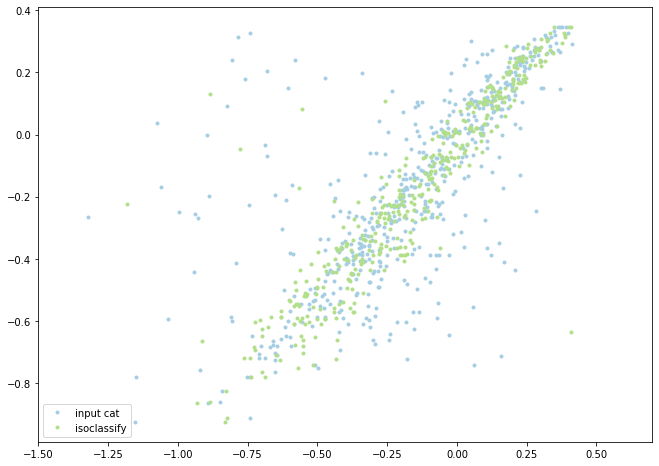

In [159]:
plt.figure(figsize=(11,8))
plt.plot(log_Densic_arr[:,0],log_Densoff_arr[:,0],'.',color=sns.color_palette()[0],label="input cat")
plt.plot(log_Densiso_arr[:,0]+np.log10(1.411),log_Densoff_arr[:,0],'.',color=sns.color_palette()[2],label="isoclassify")
plt.legend()
plt.xlim(-1.5,0.7)

In [145]:
log_Densiso_arr[~np.isnan(log_Densiso_arr[:,0]),0]

array([-7.19756173e-01, -6.90820266e-01, -3.35004724e-01, -4.91196949e-01,
       -2.62870494e-01, -5.66583128e-01, -5.56667332e-01,            -inf,
       -4.09559523e-01, -4.06486590e-01, -4.53140981e-01,            -inf,
       -7.25874147e-01,            -inf, -2.81298100e-01, -7.12018058e-01,
       -5.68780421e-01, -1.06231026e+00, -5.85333692e-01, -7.52913838e-01,
       -1.09743834e-01,            -inf,            -inf,            -inf,
       -5.42991400e-01, -5.03346505e-01,            -inf, -3.57287190e-01,
       -2.30288908e-01, -6.52272106e-01, -1.75786910e-01, -5.15867202e-01,
                  -inf, -3.52373805e-01, -3.57900165e-01, -6.73915764e-01,
       -6.49038827e-01, -9.76100615e-01, -3.11257913e-01, -8.78162356e-01,
       -4.80451413e-02, -5.18349782e-01,            -inf, -5.90437959e-01,
                  -inf, -3.32172358e-01, -7.81136254e-01,            -inf,
       -5.47650597e-01,            -inf,  3.87822496e-03, -5.82341522e-01,
       -1.08137074e+00, -

In [87]:
a

array([0.85471766, 0.93079144, 0.8920361 , 0.88753305])

<function BCES.bces.bces.bces(y1, y1err, y2, y2err, cerr)>

In [60]:
np.polyval?

Dens_ic

In [35]:
Dens_ic[()]

{1435467.0: [array([ 0.27639972, -0.0213253 ,  0.0207158 ])],
 2837475.0: [array([ 0.33586109, -0.01216867,  0.0191141 ])],
 3427720.0: [array([ 0.79447201, -0.04004961,  0.04700213])],
 3656476.0: [array([ 0.46902906, -0.02111977,  0.02211906])],
 3735871.0: [array([ 0.80935507, -0.06288448,  0.06816442])],
 4914923.0: [array([ 0.45194897, -0.02233168,  0.01912828])],
 5184732.0: [array([ 0.49631467, -0.01573352,  0.02576896])],
 5950854.0: [array([ 0.52537208, -0.02939759,  0.03114103])],
 6106415.0: [array([ 0.59702339, -0.02949681,  0.02526577])],
 6116048.0: [array([ 0.56810773, -0.02557052,  0.02404678])],
 6225718.0: [array([ 0.62246634, -0.02524451,  0.02184975])],
 6603624.0: [array([ 0.65386251, -0.02360737,  0.02761871])],
 6933899.0: [array([ 0.29447201, -0.01772502,  0.01885897])],
 7103006.0: [array([ 0.19844082, -0.01002835,  0.01420978])],
 7106245.0: [array([ 0.63004961, -0.07484054,  0.06866052])],
 7206837.0: [array([ 0.35031892, -0.01575478,  0.01989369])],
 7296438

In [47]:
i=False
i+=False
i+=False
print(i)

0


In [18]:
read_html

Object `read_html` not found.


In [8]:
kepas.iloc[0]

Name               Sun
KIC                NaN
Rad              1.001
e_Rad            0.005
Mass             1.001
e_Mass           0.019
Age               4.38
e_Age             0.22
Lum               0.97
e_Lum             0.03
Teff              5732
e_Teff              43
logg             4.438
e_logg           0.003
[M/H]             0.07
e_[M/H]           0.04
Plx                NaN
e_Plx              NaN
Vrot               NaN
e_Vrot             NaN
AMPmass          1.003
AMPrad            1.01
AMPage            4.38
AMPZini          0.021
AMPYini          0.281
AMPmlp            2.24
AMPXc/Xi           0.5
AMPa0            -2.54
Chi2Nr01          1.03
Chi2Nr02          0.78
Chi2Nsp           0.71
Teffsp            5777
e_Teffsp            77
[M/H]sp              0
e_[M/H]sp          0.1
Ksmag              NaN
e_Ksmag            NaN
AKs                NaN
e_AKs              NaN
Prot               NaN
e_Prot             NaN
r_Teffsp              
r_Prot               -
rho        

### Here we have a collection of well-characterised stars from Kepler (using spectra and AS) and all-sky (e.g. TESS, using spectra/interferometry/etc)

### Let's run our data-scraping tool and see if we recover densities which match those stellar parameters

In [83]:
#Getting TIC name from Astroquery:

